<a id='Q0'></a>
<center> <h1> Crypto Project - Bitcoin Price Machine Learning Experiment </h1> </center>
<center> <h2 class="blue-text" style="color: blue"> Statistical Analysis </h2> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>ZHAW CAS DAENG Group 4, 09 July 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#06065c10;border-top:0.01cm solid #53c653;border-bottom:0.01cm solid #53c653;color:#303030">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>Goal: </strong>Analyse the datasets, perform Statistical tests...</p>
        <p> <strong> Outline:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a href='#I'>Import Libraries & Setup Project Directory</a> </li>
            <li> <a href='#R'>Read the Datasets</a> </li>
            <li> <a href='#S'>Statistical Analysis and Tests</a></li>
                <ol>
                    <li><a href='#s1'>Descriptive Statistics</a></li>
                    <li><a href='#s2'>Test for Stationarity</a></li>
                    <li><a href='#s3'>Test for Autocorrelation</a></li>
                    <li><a href='#s4'>Test for Heteroskedasticity</a></li>
                    <li><a href='#s5'>Correlation Matrices</a></li>
                </ol>
        </ol>
    </div>
</div>

<a id='I'></a>
## <font color='darkblue'>__Import Libraries__</font>

In [1]:
# General libraries
import os
import pathlib
import time
import warnings
import dill
warnings.filterwarnings("ignore")

In [2]:
# Data manipulation and statistical libraries
import numpy as np
import pandas as pd
from math import ceil
from scipy import stats
from scipy.stats import f_oneway
from mlxtend.evaluate import paired_ttest_5x2cv
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.compat import lzip

In [3]:
# Data visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
# Defining Plot Styling
sns.set_style("darkgrid")
sns.despine()
plt.rc('lines', linewidth=2, color='b')
plt.rc('font', family='sans-serif')
plt.rc('font', size=10)
plt.rc('axes', titlelocation='center')
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize='large')
plt.rc('axes', labelcolor='blue')
plt.rc('figure', titlesize='large')
plt.rc('figure.subplot', hspace='0.6')
plt.rc('figure', figsize=(16,6))
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

<Figure size 432x288 with 0 Axes>

In [5]:
# Setup the project directory
workdir = pathlib.Path().absolute()
project_dir = workdir.parent
data_path = f"{project_dir}\\00_Data\\"
print(data_path)

C:\Users\akosr\CAS_DAENG\Modul_02\crypto_project_ML\00_Data\


<a id='R'></a>
## <font color='darkblue'>__Read Data__</font>

In [6]:
# Read the Daily Price Dataset
df_btc_sentiment_merged = pd.read_csv(data_path+'bitcoin_full_daily_prices.csv')
df_btc_sentiment_merged.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

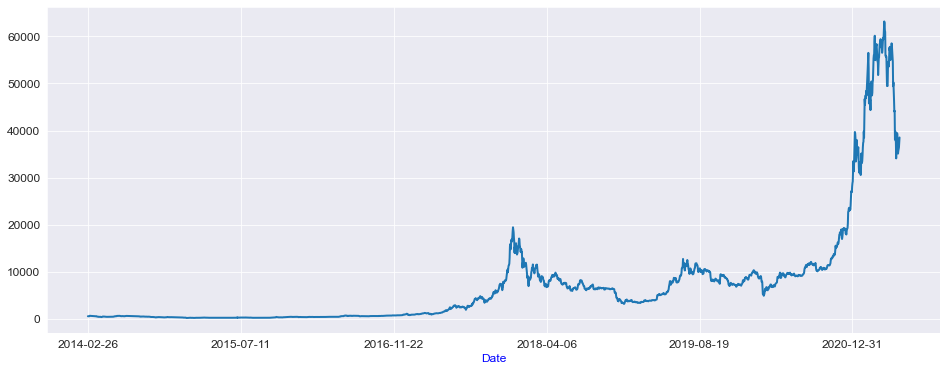

In [7]:
df_btc_sentiment_merged['WeightedPrice'].plot()

In [8]:
# Read the Daily Returns Dataset
df_btc_united_sentiment = pd.read_csv(data_path+'bitcoin_full_daily_returns.csv')
df_btc_united_sentiment.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

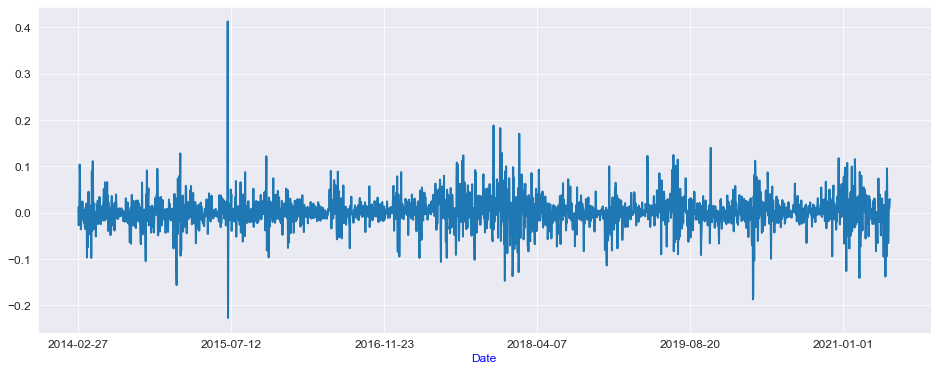

In [9]:
df_btc_united_sentiment['WeightedPrice_return'].plot()

In [10]:
# Read the Lagged Dataset
df_btc_united_lagged = pd.read_csv(data_path+'bitcoin_full_lags.csv')
df_btc_united_lagged.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

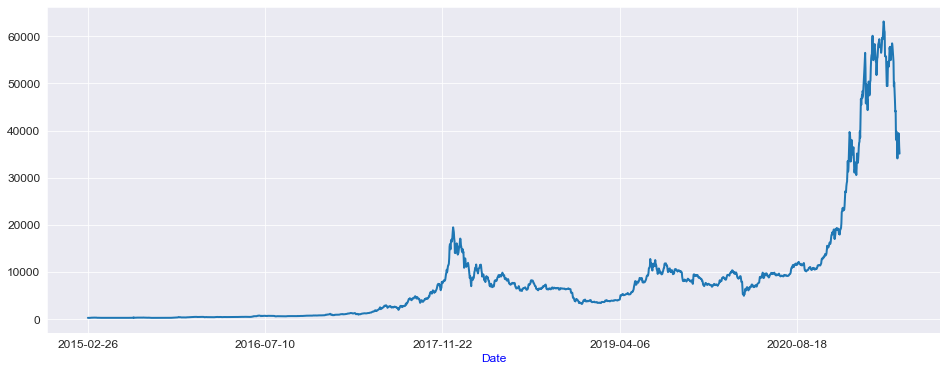

In [11]:
df_btc_united_lagged['WeightedPrice_lag5D'].plot()

<AxesSubplot:xlabel='Date'>

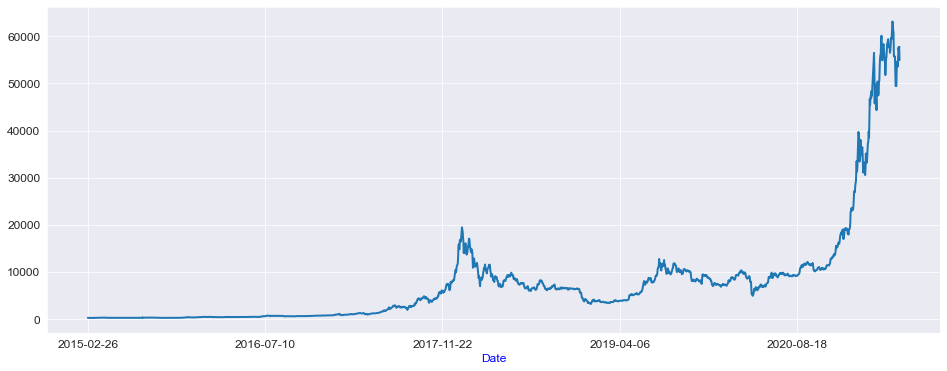

In [12]:
df_btc_united_lagged['WeightedPrice_lag30D'].plot()

<AxesSubplot:xlabel='Date'>

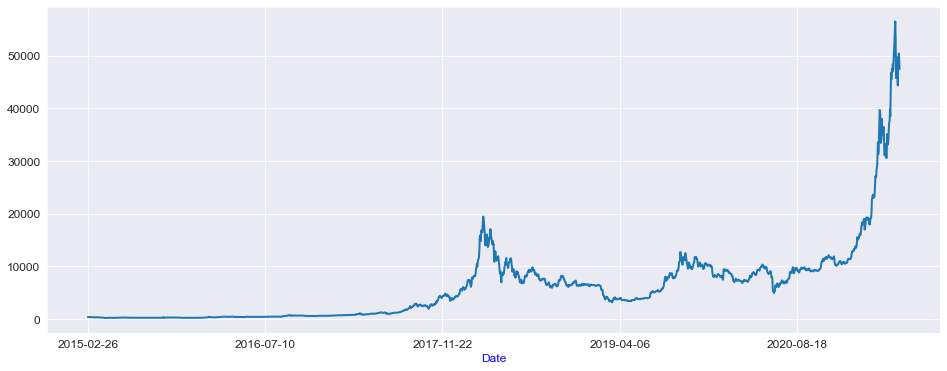

In [13]:
df_btc_united_lagged['WeightedPrice_lag90D'].plot()

<AxesSubplot:xlabel='Date'>

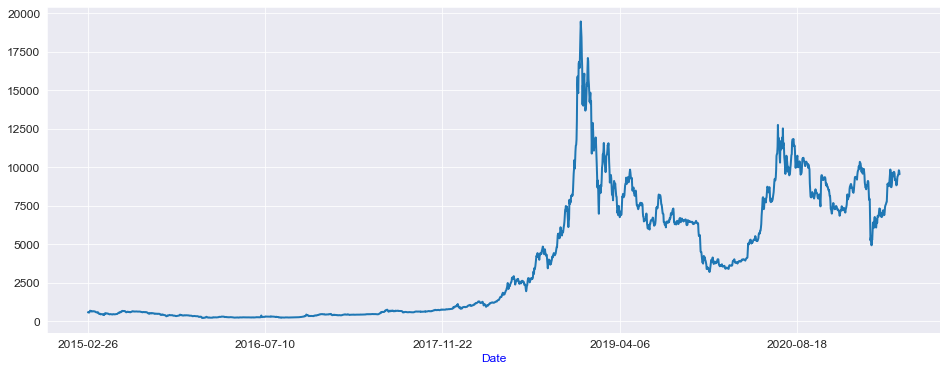

In [14]:
df_btc_united_lagged['WeightedPrice_lag365D'].plot()

<a id='S'></a>
## <font color='darkblue'>__Statistical Analysis & Tests__</font>

<a id='s1'></a>
### <font color='darkblue'>__Descriptive Statistics__</font>

#### Daily Prices Dataset

In [15]:
df_btc_sentiment_merged.tail()

Open          High           Low         Close  \
Date                                                                 
2021-05-30  34612.502291  36874.104520  33704.160000  35747.396828   
2021-05-31  35540.849080  37594.884555  34289.432437  36856.306012   
2021-06-01  36834.608199  37910.849780  35609.806635  36953.590000   
2021-06-02  36392.388000  38172.886981  35823.046893  37684.873580   
2021-06-03  37773.149489  39454.140002  37167.720828  39254.871541   

            WeightedPrice        Volume        SMA_30        EMA_40  \
Date                                                                  
2021-05-30   35691.526743   8504.035707  47092.083680  46236.097930   
2021-05-31   36000.652181  11810.338399  46370.651184  45736.807894   
2021-06-01   36394.826849  11054.120996  45683.122804  45281.101501   
2021-06-02   37449.270498  11360.908358  45005.022287  44899.060965   
2021-06-03   38531.900476  10286.898799  44457.386650  44588.467770   

            Altcoin_EMA_40        DASH  ...  Ultimate_Osc    True_SI  \
Date                                    ...                            
2021-05-30     1755.539104  180.501687  ...     47.501902 -31.435482   
2021-05-31     1737.835472  184.712506  ...     47.486347 -30.384391   
2021-06-01     1721.228576  190.135310  ...     49.308814 -29.462781   
2021-06-02     1708.242152  200.695509  ...     50.827755 -28.183494   
2021-06-03     1697.023476  207.344780  ...     52.760520 -25.999096   

             Cum_Return  Log_Return  Number_of_Transactions  Active_Addresses  \
Date                                                                            
2021-05-30  4189.105300    3.536521                179795.0          997986.0   
2021-05-31  4322.156339    3.054928                226469.0          983731.0   
2021-06-01  4333.828832    0.263607                234561.0          921569.0   
2021-06-02  4421.570949    1.959598                250589.0         1088205.0   
2021-06-03  4609.945130    4.081677                255621.0         1021654.0   

            New_Addresses    Hash_Rate  sentiment_elon  sentiment_bitcoin  
Date                                                                       
2021-05-30       308520.0  152415992.6         neutral           positive  
2021-05-31       382351.0  152948831.7        positive           positive  
2021-06-01       404739.0  148430297.2        positive           positive  
2021-06-02       429881.0  175996588.7         neutral           positive  
2021-06-03       442557.0  155954813.5         neutral           positive  

[5 rows x 53 columns]

In [16]:
df_btc_sentiment_merged.shape

(2655, 53)

In [17]:
df_btc_sentiment_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2655 entries, 2014-02-26 to 2021-06-03
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    2655 non-null   float64
 1   High                    2655 non-null   float64
 2   Low                     2655 non-null   float64
 3   Close                   2655 non-null   float64
 4   WeightedPrice           2655 non-null   float64
 5   Volume                  2655 non-null   float64
 6   SMA_30                  2655 non-null   float64
 7   EMA_40                  2655 non-null   float64
 8   Altcoin_EMA_40          2655 non-null   float64
 9   DASH                    2655 non-null   float64
 10  DOGE                    2655 non-null   float64
 11  ETC                     2655 non-null   float64
 12  ETH                     2655 non-null   float64
 13  LTC                     2655 non-null   float64
 14  SC                      2655 n

In [18]:
df_btc_sentiment_merged.describe().T

count          mean           std            min  \
Open                    2655.0  7.052644e+03  1.128013e+04     181.488000   
High                    2655.0  7.879106e+03  3.018554e+04     211.526500   
Low                     2655.0  6.791652e+03  1.080764e+04     172.028000   
Close                   2655.0  7.070961e+03  1.130830e+04     180.412000   
WeightedPrice           2655.0  7.048817e+03  1.127047e+04     203.286803   
Volume                  2655.0  2.589289e+04  2.546605e+04     977.247424   
SMA_30                  2655.0  6.834530e+03  1.092638e+04     228.749910   
EMA_40                  2655.0  6.726348e+03  1.061105e+04     240.434575   
Altcoin_EMA_40          2655.0  1.352125e+02  3.898270e+02       0.824230   
DASH                    2655.0  1.195713e+02  1.841684e+02       0.518934   
DOGE                    2655.0  1.058472e-02  5.511088e-02       0.000088   
ETC                     2655.0  7.309025e+00  9.932910e+00       0.634639   
ETH                     2655.0  2.843573e+02  5.125964e+02       0.449160   
LTC                     2655.0  5.244339e+01  6.442767e+01       1.354201   
SC                      2655.0  4.653453e-03  8.252819e-03       0.000012   
XEM                     2655.0  1.055775e-01  1.875664e-01       0.000087   
XMR                     2655.0  6.959133e+01  8.848501e+01       0.239693   
XRP                     2655.0  2.422556e-01  3.320592e-01       0.004126   
ZEC                     2655.0  2.033083e+02  6.398909e+02      23.662940   
CLF                     2655.0  5.611672e+01  1.728072e+01     -37.630001   
CNYUSDX                 2655.0  1.515816e-01  6.898711e-03       0.139315   
DJI                     2655.0  2.251132e+04  4.811665e+03   15660.179688   
EURUSDX                 2655.0  1.158225e+00  7.614417e-02       1.039047   
GCF                     2655.0  1.366035e+03  2.275274e+02    1050.800049   
GSPC                    2655.0  2.588208e+03  5.758916e+02    1815.689941   
IXIC                    2655.0  7.036673e+03  2.530262e+03    3999.729980   
JPYUSDX                 2655.0  9.070459e-03  4.594379e-04       0.007960   
TSLA                    2655.0  1.235836e+02  1.806751e+02      28.733999   
VIX                     2655.0  1.724032e+01  7.644953e+00       9.140000   
XWDTO                   2655.0  4.445600e+01  9.206519e+00      29.250366   
Cost_per_TR             2655.0  3.971084e+01  4.055945e+01       3.442916   
Num_TR_per_Block        2655.0  1.613952e+03  6.501901e+02     248.000000   
Bu_Be_Spread_MA8        2655.0  4.162985e-02  1.076674e-01      -0.219132   
SMA_05                  2655.0  7.020958e+03  1.122966e+04     209.789443   
SMA_90                  2655.0  6.233715e+03  9.514126e+03     242.302400   
EMA_05                  2655.0  7.021106e+03  1.122333e+04     216.980632   
EMA_90                  2655.0  6.269969e+03  9.436353e+03     246.682554   
MACD                    2655.0  1.155004e+02  7.300842e+02   -5045.091644   
Avg_Dir_Mvmt            2655.0  3.374723e+01  1.719450e+01       6.183548   
RSI                     2655.0  5.325880e+01  1.397890e+01       8.766280   
Awesome_Osc             2655.0  2.229611e+02  5.906993e+03  -19763.828223   
ROC                     2655.0  2.370328e+00  1.283274e+01     -44.843839   
Stoch_RSI               2655.0  5.120627e-01  3.590863e-01       0.000000   
Ultimate_Osc            2655.0  5.321794e+01  1.075791e+01       0.342926   
True_SI                 2655.0  6.374883e+00  2.491510e+01     -68.936228   
Cum_Return              2655.0  7.484002e+02  1.356812e+03     -78.353499   
Log_Return              2655.0  1.620742e-01  3.971344e+00     -45.674690   
Number_of_Transactions  2655.0  2.309531e+05  9.319138e+04   47740.000000   
Active_Addresses        2655.0  6.244459e+05  2.836892e+05  116971.000000   
New_Addresses           2655.0  3.105944e+05  1.386597e+05   54748.000000   
Hash_Rate               2655.0  4.112644e+07  5.186897e+07   26872.265760   

                    

In [19]:
df_btc_sentiment_merged.isna().sum()

Open                      0
High                      0
Low                       0
Close                     0
WeightedPrice             0
Volume                    0
SMA_30                    0
EMA_40                    0
Altcoin_EMA_40            0
DASH                      0
DOGE                      0
ETC                       0
ETH                       0
LTC                       0
SC                        0
XEM                       0
XMR                       0
XRP                       0
ZEC                       0
CLF                       0
CNYUSDX                   0
DJI                       0
EURUSDX                   0
GCF                       0
GSPC                      0
IXIC                      0
JPYUSDX                   0
TSLA                      0
VIX                       0
XWDTO                     0
Cost_per_TR               0
Num_TR_per_Block          0
Bu_Be_Spread_MA8          0
SMA_05                    0
SMA_90                    0
EMA_05              

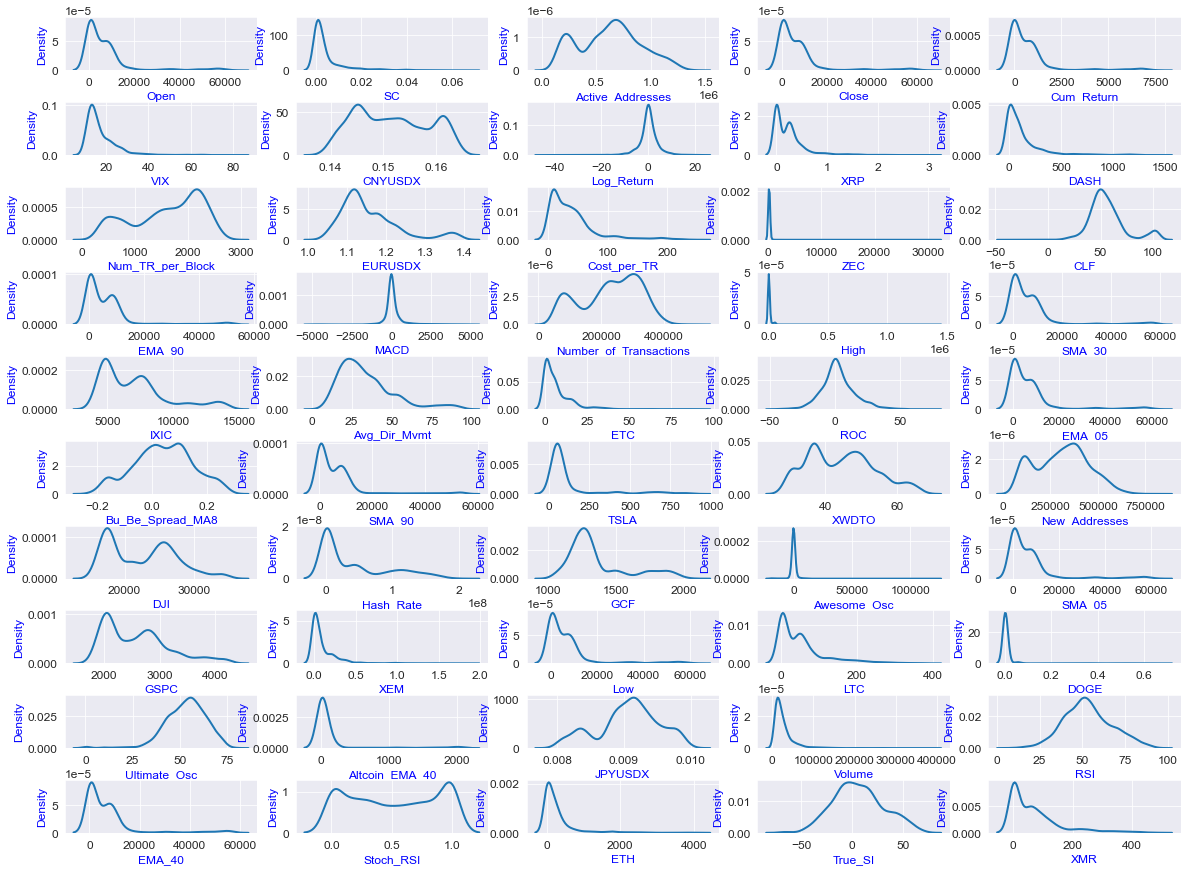

In [20]:
# Distribution Plots

features = set(df_btc_sentiment_merged.columns) - set(['WeightedPrice', 'sentiment_elon', 'sentiment_bitcoin'])

fig, ax = plt.subplots(ncols=5, nrows=10, figsize=(20,15))
for feat_num, feat_name in enumerate(features):
    sns.kdeplot(data=df_btc_sentiment_merged, x=df_btc_sentiment_merged[feat_name], ax=ax[int(feat_num/5), feat_num%5])

plt.show()

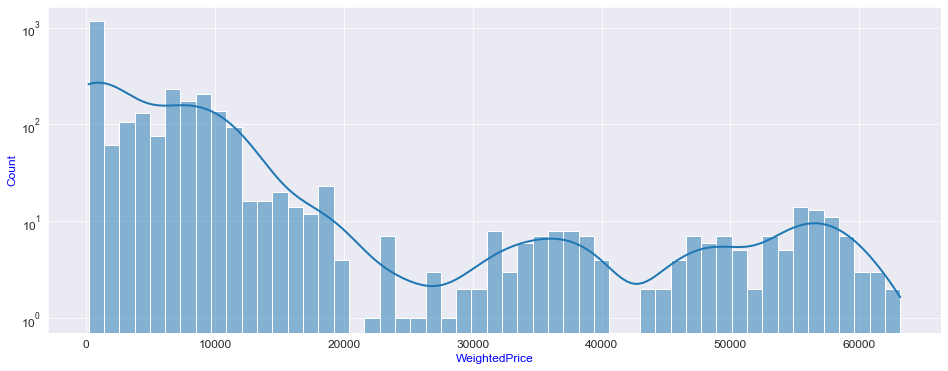

In [21]:
# Distribution of Daily Prices
sns.histplot(df_btc_sentiment_merged, x="WeightedPrice", kde=True)
plt.yscale('log')
plt.show()

In [22]:
# Distribution of Daily Prices
df_by_year = df_btc_sentiment_merged.copy().reset_index()
df_by_year['Year'] = pd.to_datetime(df_by_year['Date']).dt.year
df_by_year['Month'] = pd.to_datetime(df_by_year['Date']).dt.month_name()
df_by_year['Day_of_Week'] = pd.to_datetime(df_by_year['Date']).dt.day_name()
df_by_year.set_index('Date', inplace=True)

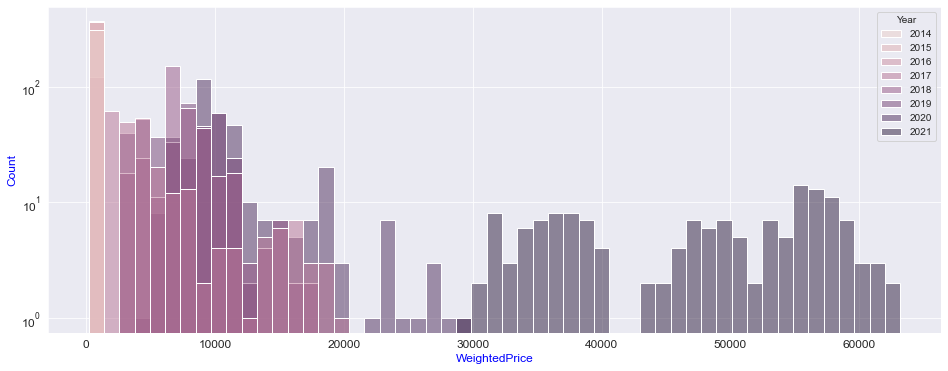

In [23]:
sns.histplot(df_by_year, x="WeightedPrice", hue="Year")
plt.yscale('log')
plt.show()

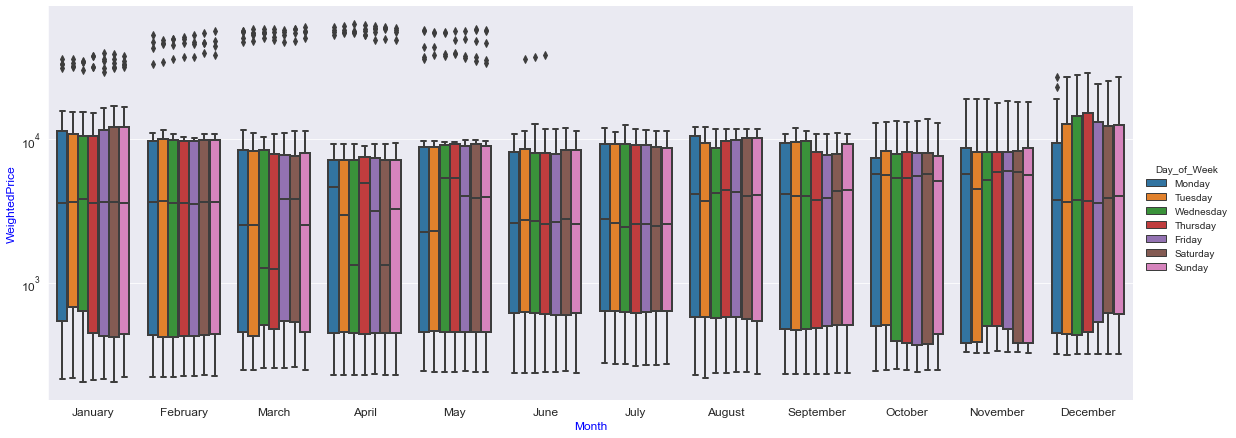

In [24]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.catplot(x="Month", y="WeightedPrice", hue="Day_of_Week", kind="box", data=df_by_year, height=6, aspect=16/6, hue_order=hue_order, order=order)
plt.yscale('log')
plt.show()

#### Daily Returns Dataset

In [25]:
df_btc_united_sentiment.head()

WeightedPrice_return  DASH_return  DOGE_return  ETC_return  \
Date                                                                     
2014-02-27              0.011386    -0.008975     0.053527         0.0   
2014-02-28             -0.027055    -0.175048    -0.075702         0.0   
2014-03-01             -0.011626     0.650333    -0.027232         0.0   
2014-03-02              0.007199     0.065323    -0.052048         0.0   
2014-03-03              0.103996     0.182002     0.041269         0.0   

            ETH_return  LTC_return  SC_return  XEM_return  XMR_return  \
Date                                                                    
2014-02-27         0.0   -0.015164        0.0         0.0         0.0   
2014-02-28         0.0   -0.048588        0.0         0.0         0.0   
2014-03-01         0.0   -0.023403        0.0         0.0         0.0   
2014-03-02         0.0    0.002097        0.0         0.0         0.0   
2014-03-03         0.0    0.003390        0.0         0.0         0.0   

            XRP_return  ...  Ultimate_Osc    True_SI  Cum_Return  Log_Return  \
Date                    ...                                                    
2014-02-27         0.0  ...     58.716324 -36.370363  -30.554323   -0.435788   
2014-02-28         0.0  ...     53.579582 -35.543868  -34.123058   -5.275634   
2014-03-01         0.0  ...     52.170204 -34.013875  -32.549358    2.360762   
2014-03-02         0.0  ...     54.508004 -32.805675  -32.565198   -0.023487   
2014-03-03         0.0  ...     63.022875 -25.115659  -19.968961   17.125332   

            Number_of_Transactions  Active_Addresses  New_Addresses  \
Date                                                                  
2014-02-27                 70859.0          185098.0        95229.0   
2014-02-28                 70290.0          196525.0        92184.0   
2014-03-01                 63402.0          181719.0       100239.0   
2014-03-02                 56635.0          159491.0        80905.0   
2014-03-03                 81264.0          237371.0       123677.0   

              Hash_Rate  sentiment_elon  sentiment_bitcoin  
Date                                                        
2014-02-27  29478.51454         neutral           positive  
2014-02-28  31620.29868         neutral           positive  
2014-03-01  27215.36710         neutral           positive  
2014-03-02  26872.26576         neutral           positive  
2014-03-03  28209.55635         neutral           positive  

[5 rows x 49 columns]

In [26]:
df_btc_united_sentiment.shape

(2654, 49)

In [27]:
df_btc_united_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, 2014-02-27 to 2021-06-03
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   WeightedPrice_return    2654 non-null   float64
 1   DASH_return             2654 non-null   float64
 2   DOGE_return             2654 non-null   float64
 3   ETC_return              2654 non-null   float64
 4   ETH_return              2654 non-null   float64
 5   LTC_return              2654 non-null   float64
 6   SC_return               2654 non-null   float64
 7   XEM_return              2654 non-null   float64
 8   XMR_return              2654 non-null   float64
 9   XRP_return              2654 non-null   float64
 10  ZEC_return              2654 non-null   float64
 11  CLF_return              2654 non-null   float64
 12  CNYUSDX_return          2654 non-null   float64
 13  DJI_return              2654 non-null   float64
 14  EURUSDX_return          2654 n

In [28]:
df_btc_united_sentiment.describe().T

count          mean           std            min  \
WeightedPrice_return    2654.0  2.152529e-03  3.374595e-02      -0.227187   
DASH_return             2654.0  4.057017e-03  6.323055e-02      -0.342895   
DOGE_return             2654.0  4.778037e-03  7.895444e-02      -0.319407   
ETC_return              2654.0  3.079187e-03  6.099983e-02      -0.306498   
ETH_return              2654.0  3.804522e-03  5.250615e-02      -0.877162   
LTC_return              2654.0  2.256214e-03  5.183254e-02      -0.302304   
SC_return               2654.0  4.886202e-03  8.231037e-02      -0.849481   
XEM_return              2654.0  4.175567e-03  7.039710e-02      -0.898653   
XMR_return              2654.0  3.510912e-03  6.391762e-02      -0.787380   
XRP_return              2654.0  3.733373e-03  6.401171e-02      -0.311551   
ZEC_return              2654.0  4.321672e-02  2.227288e+00      -0.835465   
CLF_return              2654.0 -1.238435e-03  6.909405e-02      -3.059661   
CNYUSDX_return          2654.0 -1.387936e-05  2.066724e-03      -0.018243   
DJI_return              2654.0  3.317523e-04  9.563778e-03      -0.129265   
EURUSDX_return          2654.0 -3.582027e-05  4.203094e-03      -0.027752   
GCF_return              2654.0  1.584558e-04  7.659374e-03      -0.049787   
GSPC_return             2654.0  3.524553e-04  9.262988e-03      -0.119841   
IXIC_return             2654.0  4.904905e-04  1.050194e-02      -0.123213   
JPYUSDX_return          2654.0 -1.695557e-05  4.372011e-03      -0.032151   
TSLA_return             2654.0  1.319212e-03  2.850439e-02      -0.210628   
VIX_return              2654.0  2.547547e-03  7.398655e-02      -0.259057   
XWDTO_return            2654.0  3.251299e-04  8.218351e-03      -0.097632   
Volume                  2654.0  2.586976e+04  2.544293e+04     977.247424   
SMA_30                  2654.0  6.836848e+03  1.092779e+04     228.749910   
EMA_40                  2654.0  6.728628e+03  1.061240e+04     240.434575   
Altcoin_EMA_40          2654.0  1.352601e+02  3.898928e+02       0.824230   
Cost_per_TR             2654.0  3.971048e+01  4.056709e+01       3.442916   
Num_TR_per_Block        2654.0  1.614411e+03  6.498818e+02     248.000000   
Bu_Be_Spread_MA8        2654.0  4.160245e-02  1.076784e-01      -0.219132   
SMA_05                  2654.0  7.023391e+03  1.123108e+04     209.789443   
SMA_90                  2654.0  6.235833e+03  9.515294e+03     242.302400   
EMA_05                  2654.0  7.023541e+03  1.122474e+04     216.980632   
EMA_90                  2654.0  6.272048e+03  9.437522e+03     246.682554   
MACD                    2654.0  1.155642e+02  7.302144e+02   -5045.091644   
Avg_Dir_Mvmt            2654.0  3.373136e+01  1.717827e+01       6.183548   
RSI                     2654.0  5.326433e+01  1.397863e+01       8.766280   
Awesome_Osc             2654.0  2.230949e+02  5.908102e+03  -19763.828223   
ROC                     2654.0  2.373417e+00  1.283417e+01     -44.843839   
Stoch_RSI               2654.0  5.118789e-01  3.590289e-01       0.000000   
Ultimate_Osc            2654.0  5.321761e+01  1.075993e+01       0.342926   
True_SI                 2654.0  6.391854e+00  2.490444e+01     -68.936228   
Cum_Return              2654.0  7.486935e+02  1.356983e+03     -78.353499   
Log_Return              2654.0  1.587238e-01  3.968338e+00     -45.674690   
Number_of_Transactions  2654.0  2.310125e+05  9.315858e+04   47740.000000   
Active_Addresses        2654.0  6.246053e+05  2.836236e+05  116971.000000   
New_Addresses           2654.0  3.106696e+05  1.386315e+05   54748.000000   
Hash_Rate               2654.0  4.114193e+07  5.187260e+07   26872.265760   

                                  25%           50%           75%  \
WeightedPrice_return        -0.011616  1.397842e-03  1.641338e-02   
DASH_return                 -0.025517 -6.187222e-04  2.615049e-02   
DOGE_return                 -0.024863 -1.911478e-03  2.179802e-02   
ETC_return                  -0.009472  0.000000e+00 

In [29]:
df_btc_united_sentiment.isna().sum()

WeightedPrice_return      0
DASH_return               0
DOGE_return               0
ETC_return                0
ETH_return                0
LTC_return                0
SC_return                 0
XEM_return                0
XMR_return                0
XRP_return                0
ZEC_return                0
CLF_return                0
CNYUSDX_return            0
DJI_return                0
EURUSDX_return            0
GCF_return                0
GSPC_return               0
IXIC_return               0
JPYUSDX_return            0
TSLA_return               0
VIX_return                0
XWDTO_return              0
Volume                    0
SMA_30                    0
EMA_40                    0
Altcoin_EMA_40            0
Cost_per_TR               0
Num_TR_per_Block          0
Bu_Be_Spread_MA8          0
SMA_05                    0
SMA_90                    0
EMA_05                    0
EMA_90                    0
MACD                      0
Avg_Dir_Mvmt              0
RSI                 

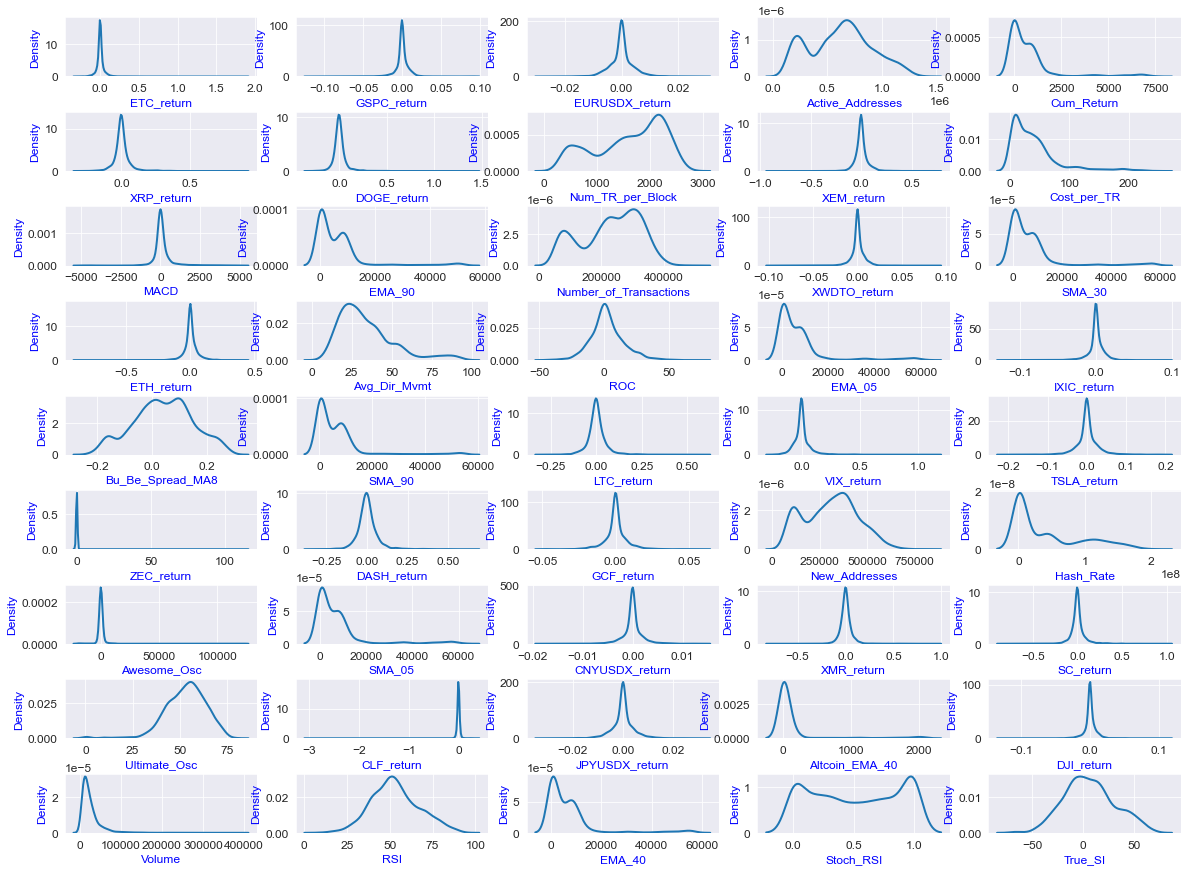

In [30]:
# Distribution Plots - Daily Returns

features_return = set(df_btc_united_sentiment.columns) - set(['WeightedPrice_return', 'sentiment_elon', 'sentiment_bitcoin', 'Log_Return'])

fig, ax = plt.subplots(ncols=5, nrows=9, figsize=(20,15))
for feat_num, feat_name in enumerate(features_return):
    sns.kdeplot(data=df_btc_united_sentiment, x=df_btc_united_sentiment[feat_name], ax=ax[int(feat_num/5), feat_num%5])

plt.show()

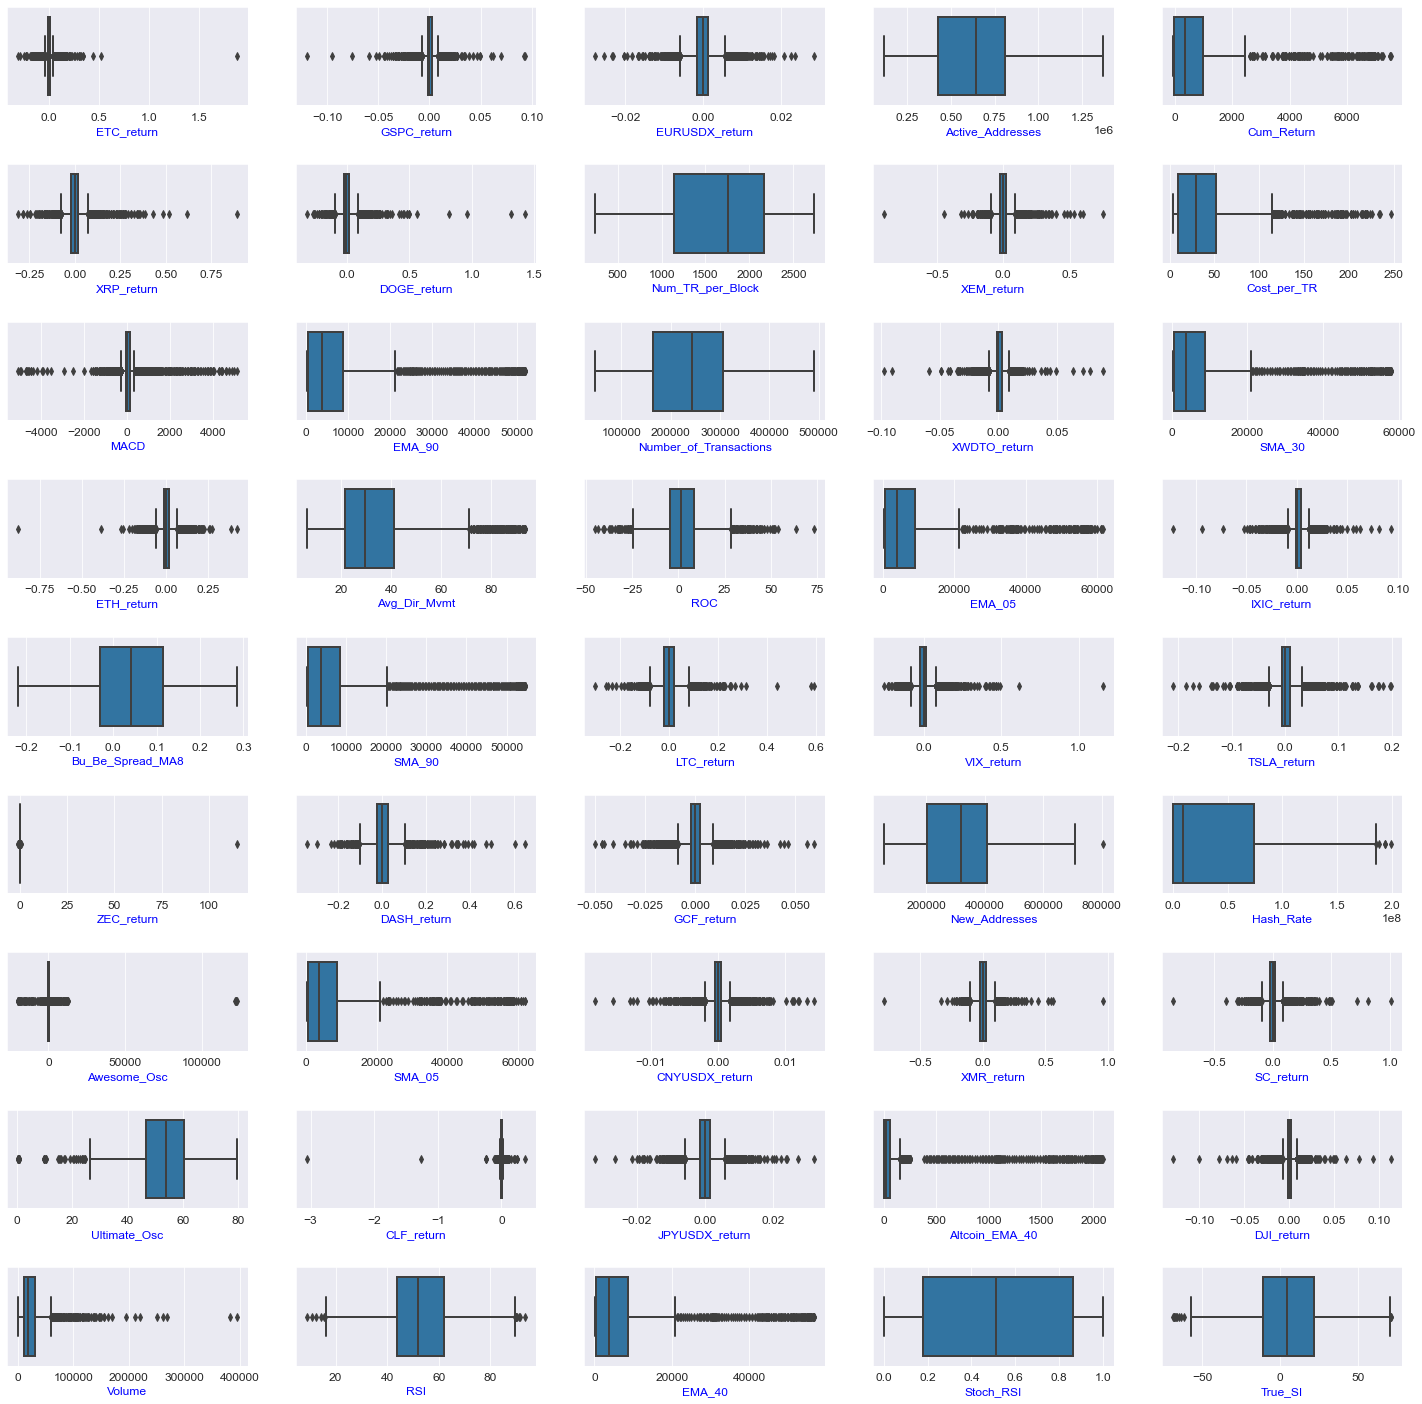

In [31]:
# Boxplots - Daily Returns

fig, ax = plt.subplots(ncols=5, nrows=9, figsize=(25,25))
for feat_num, feat_name in enumerate(features_return):
    sns.boxplot(data=df_btc_united_sentiment, x=df_btc_united_sentiment[feat_name], ax=ax[int(feat_num/5), feat_num%5])

plt.show()

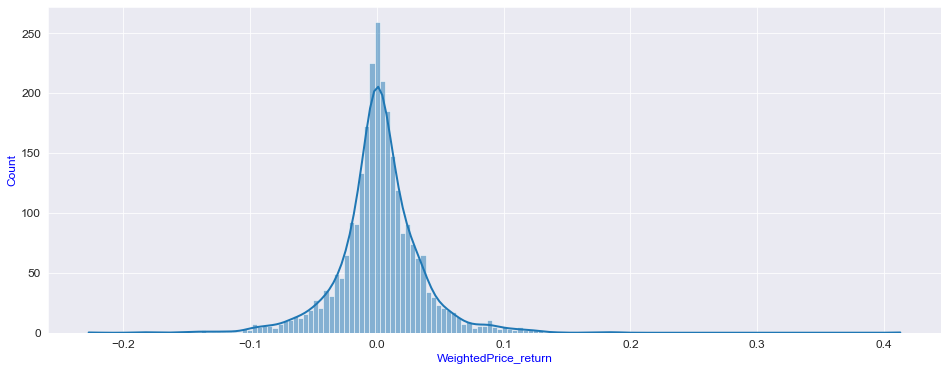

In [32]:
# Distribution of Daily Returns
sns.histplot(df_btc_united_sentiment, x="WeightedPrice_return", kde=True)
plt.show()

#### Daily Returns Dataset - shortened (2017+) used for modeling

In [33]:
# Select Subset of Data, based on Date - Daily Returns
initial_date = '2017-01-01'
finish_date = '2021-06-03'
df_BTC_united_returns = df_btc_united_sentiment[initial_date:finish_date]

In [34]:
df_BTC_united_returns.head()

WeightedPrice_return  DASH_return  DOGE_return  ETC_return  \
Date                                                                     
2017-01-01              0.032335     0.012253    -0.012549    0.000923   
2017-01-02              0.044238     0.037856    -0.003227    0.003318   
2017-01-03             -0.005809     0.066852    -0.005809    0.047304   
2017-01-04              0.078557     0.241382     0.027197    0.097614   
2017-01-05             -0.072940    -0.074427    -0.026587   -0.018192   

            ETH_return  LTC_return  SC_return  XEM_return  XMR_return  \
Date                                                                    
2017-01-01    0.041325    0.030610  -0.010678   -0.061270    0.014706   
2017-01-02   -0.001291    0.045523   0.044238   -0.015263    0.141209   
2017-01-03    0.114734   -0.019911  -0.005809    0.015216    0.036727   
2017-01-04    0.153225    0.008954   0.125451    0.008355    0.076648   
2017-01-05   -0.046504   -0.036768   0.004315   -0.037735   -0.054287   

            XRP_return  ...  Ultimate_Osc    True_SI  Cum_Return  Log_Return  \
Date                    ...                                                    
2017-01-01    0.001748  ...     73.024668  59.068383   18.957745    2.362286   
2017-01-02   -0.013155  ...     62.301410  60.701434   22.805271    3.183159   
2017-01-03    0.000616  ...     62.125663  62.426971   24.826253    1.632285   
2017-01-04    0.037008  ...     65.901694  66.364532   37.075366    9.360810   
2017-01-05   -0.096155  ...     59.100276  55.774443   21.843938  -11.778986   

            Number_of_Transactions  Active_Addresses  New_Addresses  \
Date                                                                  
2017-01-01                180502.0          465501.0       213250.0   
2017-01-02                290951.0          706004.0       350945.0   
2017-01-03                301664.0          656631.0       363271.0   
2017-01-04                328642.0          699023.0       394821.0   
2017-01-05                288501.0          653187.0       352053.0   

              Hash_Rate  sentiment_elon  sentiment_bitcoin  
Date                                                        
2017-01-01  2463729.875         neutral           positive  
2017-01-02  2514431.983         neutral           positive  
2017-01-03  2590799.583         neutral           positive  
2017-01-04  2490281.523         neutral           positive  
2017-01-05  2204094.403         neutral           positive  

[5 rows x 49 columns]

In [35]:
df_BTC_united_returns.shape

(1615, 49)

In [36]:
df_BTC_united_returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 2017-01-01 to 2021-06-03
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   WeightedPrice_return    1615 non-null   float64
 1   DASH_return             1615 non-null   float64
 2   DOGE_return             1615 non-null   float64
 3   ETC_return              1615 non-null   float64
 4   ETH_return              1615 non-null   float64
 5   LTC_return              1615 non-null   float64
 6   SC_return               1615 non-null   float64
 7   XEM_return              1615 non-null   float64
 8   XMR_return              1615 non-null   float64
 9   XRP_return              1615 non-null   float64
 10  ZEC_return              1615 non-null   float64
 11  CLF_return              1615 non-null   float64
 12  CNYUSDX_return          1615 non-null   float64
 13  DJI_return              1615 non-null   float64
 14  EURUSDX_return          1615 n

In [37]:
df_BTC_united_returns.describe().T

count          mean           std           min  \
WeightedPrice_return    1615.0  2.927253e-03  3.569655e-02 -1.871616e-01   
DASH_return             1615.0  3.372183e-03  5.676166e-02 -2.980533e-01   
DOGE_return             1615.0  7.879777e-03  9.016244e-02 -3.194073e-01   
ETC_return              1615.0  4.060332e-03  5.951699e-02 -2.913520e-01   
ETH_return              1615.0  4.833468e-03  4.923030e-02 -2.533712e-01   
LTC_return              1615.0  3.785195e-03  5.471544e-02 -2.587113e-01   
SC_return               1615.0  5.551930e-03  7.751971e-02 -2.980032e-01   
XEM_return              1615.0  4.637801e-03  6.747162e-02 -4.428118e-01   
XMR_return              1615.0  3.175383e-03  5.015736e-02 -2.859777e-01   
XRP_return              1615.0  5.382257e-03  7.024270e-02 -3.115511e-01   
ZEC_return              1615.0  2.405307e-03  5.856281e-02 -3.067783e-01   
CLF_return              1615.0 -1.785908e-03  8.684459e-02 -3.059661e+00   
CNYUSDX_return          1615.0  5.525533e-05  2.322698e-03 -1.567442e-02   
DJI_return              1615.0  4.067862e-04  1.094814e-02 -1.292655e-01   
EURUSDX_return          1615.0  9.535079e-05  3.565444e-03 -2.775173e-02   
GCF_return              1615.0  3.299216e-04  7.544636e-03 -4.978726e-02   
GSPC_return             1615.0  4.435186e-04  1.044882e-02 -1.198406e-01   
IXIC_return             1615.0  6.440950e-04  1.174422e-02 -1.232133e-01   
JPYUSDX_return          1615.0  4.398366e-05  3.845728e-03 -2.633639e-02   
TSLA_return             1615.0  2.130918e-03  3.243098e-02 -2.106283e-01   
VIX_return              1615.0  2.772864e-03  7.737213e-02 -2.590567e-01   
XWDTO_return            1615.0  3.420845e-04  9.124358e-03 -9.763242e-02   
Volume                  1615.0  2.096333e+04  1.518693e+04  9.772474e+02   
SMA_30                  1615.0  1.095363e+04  1.236755e+04  8.365492e+02   
EMA_40                  1615.0  1.077544e+04  1.196871e+04  8.347577e+02   
Altcoin_EMA_40          1615.0  2.180760e+02  4.817580e+02  8.295828e+00   
Cost_per_TR             1615.0  5.628663e+01  4.380731e+01  5.470000e+00   
Num_TR_per_Block        1615.0  2.011649e+03  3.582665e+02  8.850671e+02   
Bu_Be_Spread_MA8        1615.0  3.380559e-02  1.129020e-01 -2.191317e-01   
SMA_05                  1615.0  1.125855e+04  1.270727e+04  8.190685e+02   
SMA_90                  1615.0  9.968002e+03  1.064003e+04  7.422088e+02   
EMA_05                  1615.0  1.125877e+04  1.269801e+04  8.314464e+02   
EMA_90                  1615.0  1.002354e+04  1.050795e+04  7.638658e+02   
MACD                    1615.0  1.893476e+02  9.286407e+02 -5.045092e+03   
Avg_Dir_Mvmt            1615.0  3.338805e+01  1.760689e+01  8.993210e+00   
RSI                     1615.0  5.449253e+01  1.474055e+01  8.766280e+00   
Awesome_Osc             1615.0  3.649207e+02  7.571224e+03 -1.976383e+04   
ROC                     1615.0  3.294393e+00  1.426645e+01 -4.484384e+01   
Stoch_RSI               1615.0  5.160427e-01  3.658637e-01  0.000000e+00   
Ultimate_Osc            1615.0  5.494554e+01  1.063900e+01  3.429258e-01   
True_SI                 1615.0  9.019619e+00  2.637186e+01 -6.893623e+01   
Cum_Return              1615.0  1.260610e+03  1.535163e+03 -5.228083e+00   
Log_Return              1615.0  2.292437e-01  4.271327e+00 -4.567469e+01   
Number_of_Transactions  1615.0  2.867279e+05  5.614524e+04  1.318750e+05   
Active_Addresses        1615.0  8.053662e+05  1.854638e+05  4.105020e+05   
New_Addresses           1615.0  3.981626e+05  9.065945e+04  1.979050e+05   
Hash_Rate               1615.0  6.714037e+07  5.191371e+07  2.142958e+06   

                                 25%           50%           75%           max  
WeightedPrice_return   -1.226283e-02  2.460212e-03  2.020844e-02  1.881243e-01  
DASH_return            -2.385969e-02  1.602888e-03  2.696895e-02  4.698617e-01  
DOGE_return            -2.491002e-02 -8.515947e-04  2.652104e-02  1.427517e+00  
ETC_return             -2.081477e-02  1.518872e-03  

In [38]:
df_BTC_united_returns.isna().sum()

WeightedPrice_return      0
DASH_return               0
DOGE_return               0
ETC_return                0
ETH_return                0
LTC_return                0
SC_return                 0
XEM_return                0
XMR_return                0
XRP_return                0
ZEC_return                0
CLF_return                0
CNYUSDX_return            0
DJI_return                0
EURUSDX_return            0
GCF_return                0
GSPC_return               0
IXIC_return               0
JPYUSDX_return            0
TSLA_return               0
VIX_return                0
XWDTO_return              0
Volume                    0
SMA_30                    0
EMA_40                    0
Altcoin_EMA_40            0
Cost_per_TR               0
Num_TR_per_Block          0
Bu_Be_Spread_MA8          0
SMA_05                    0
SMA_90                    0
EMA_05                    0
EMA_90                    0
MACD                      0
Avg_Dir_Mvmt              0
RSI                 

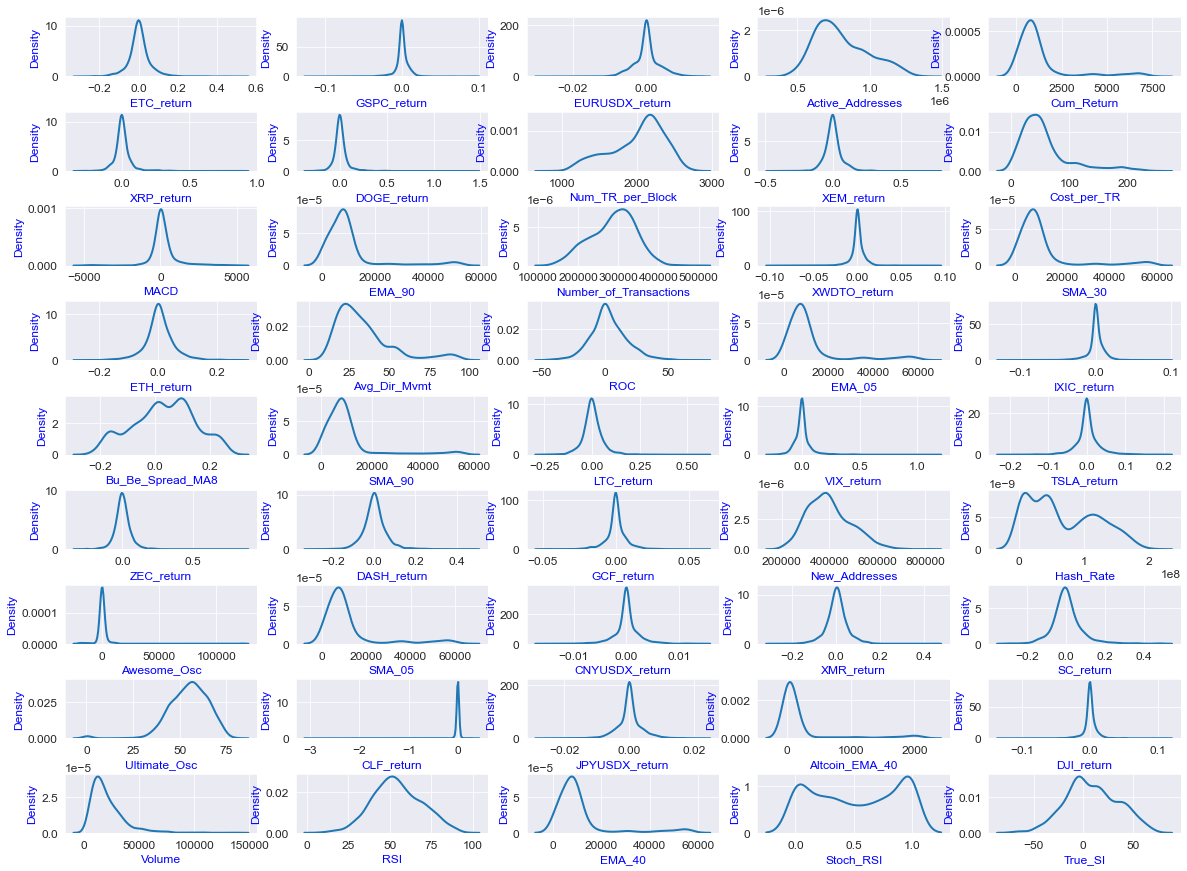

In [39]:
# Distribution Plots - Daily Returns

features_return = set(df_BTC_united_returns.columns) - set(['WeightedPrice_return', 'sentiment_elon', 'sentiment_bitcoin', 'Log_Return'])

fig, ax = plt.subplots(ncols=5, nrows=9, figsize=(20,15))
for feat_num, feat_name in enumerate(features_return):
    sns.kdeplot(data=df_BTC_united_returns, x=df_BTC_united_returns[feat_name], ax=ax[int(feat_num/5), feat_num%5])

plt.show()

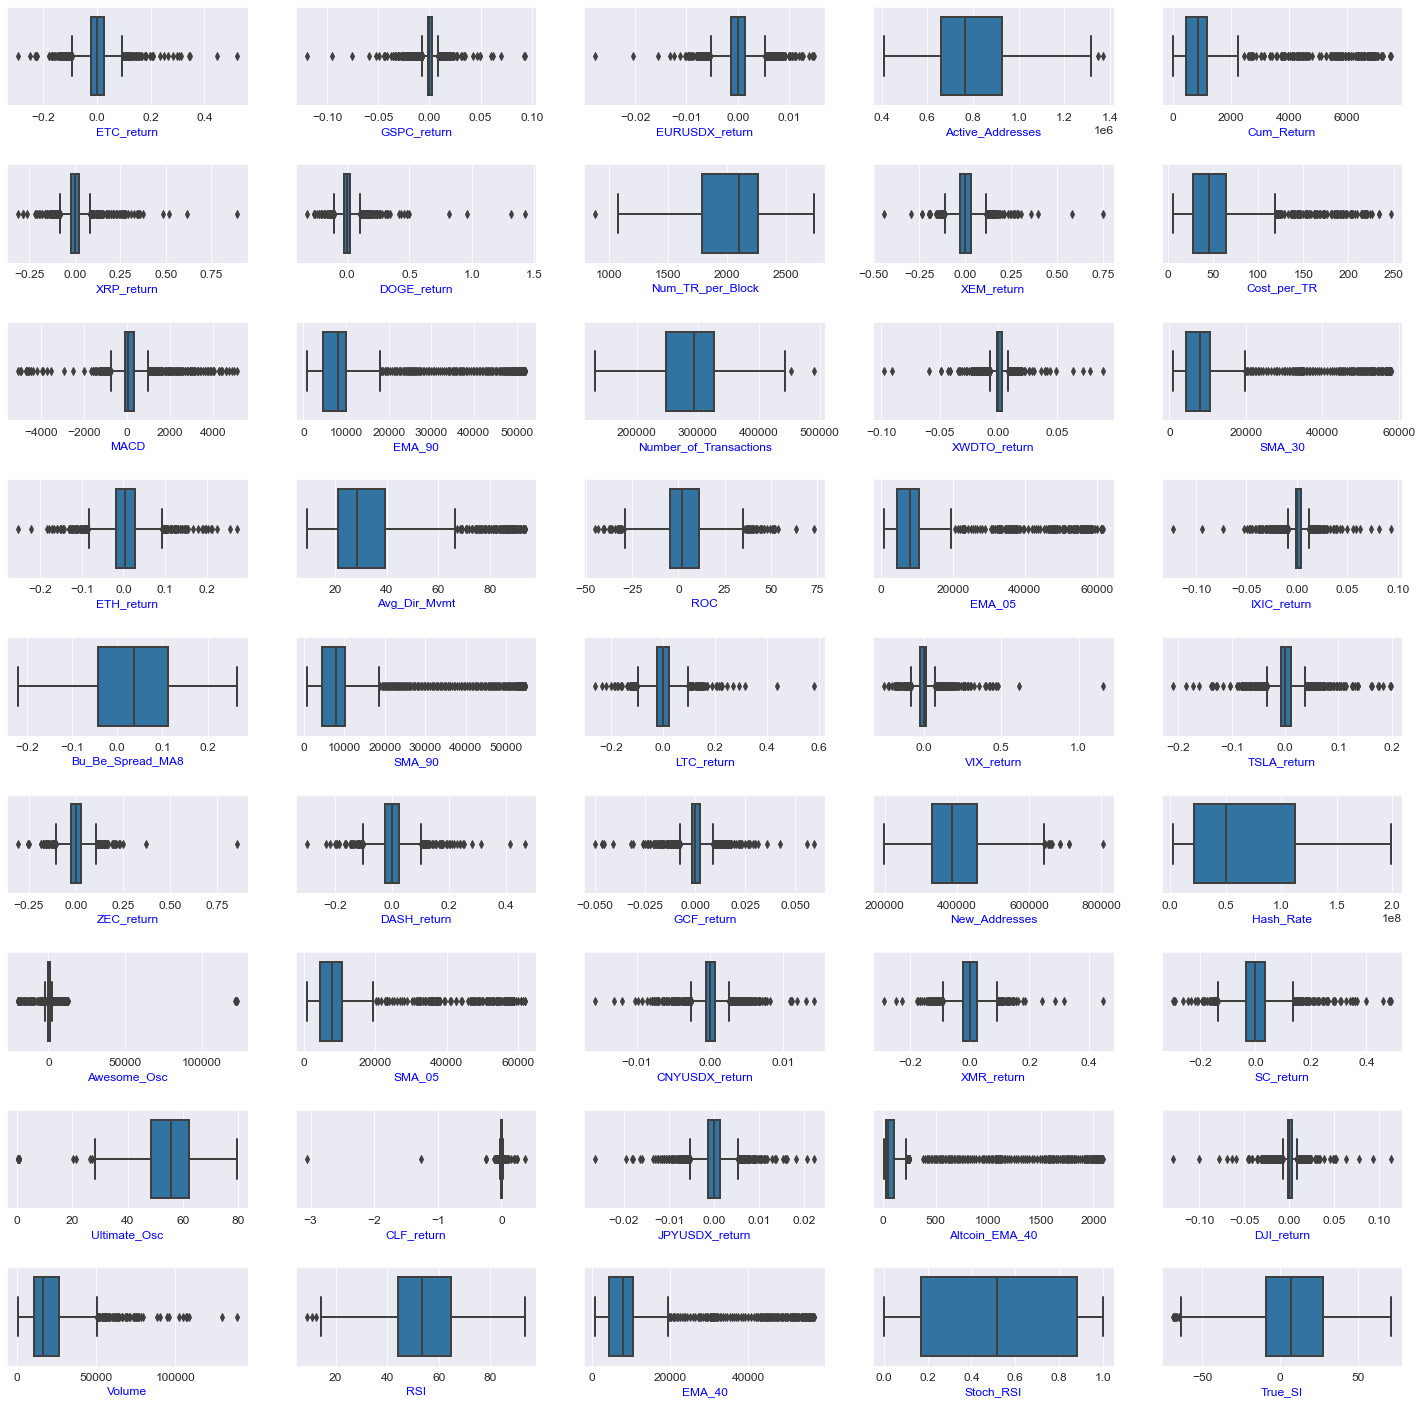

In [40]:
# Boxplots - Daily Returns

fig, ax = plt.subplots(ncols=5, nrows=9, figsize=(25,25))
for feat_num, feat_name in enumerate(features_return):
    sns.boxplot(data=df_BTC_united_returns, x=df_BTC_united_returns[feat_name], ax=ax[int(feat_num/5), feat_num%5])

plt.show()

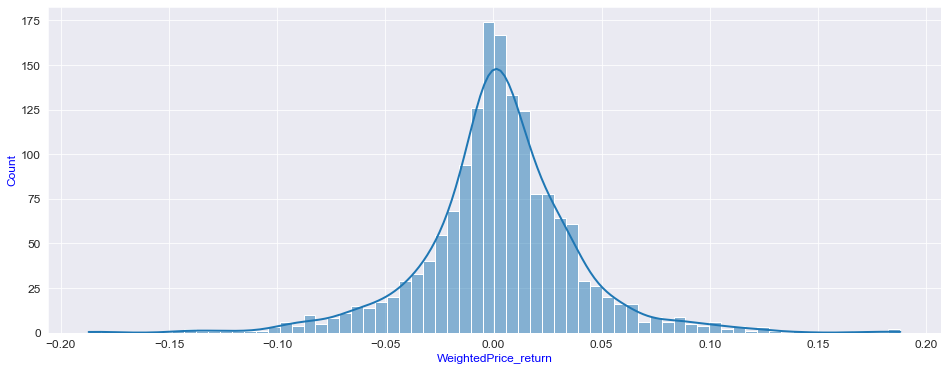

In [41]:
# Distribution of Daily Returns
sns.histplot(df_BTC_united_returns, x="WeightedPrice_return", kde=True)
plt.show()

#### Daily Returns Dateset with Lags

In [42]:
df_btc_united_lagged.head()

WeightedPrice_return  DASH_return  DOGE_return  ETC_return  \
Date                                                                     
2015-02-26             -0.005346    -0.035572    -0.005346         0.0   
2015-02-27              0.048136     0.106524     0.030371         0.0   
2015-02-28             -0.009568     0.035709    -0.043721         0.0   
2015-03-01              0.017268     0.067893     0.017268         0.0   
2015-03-02              0.057656     0.047262     0.038769         0.0   

            ETH_return  LTC_return  SC_return  XEM_return  XMR_return  \
Date                                                                    
2015-02-26         0.0    0.005253        0.0         0.0    0.034064   
2015-02-27         0.0    0.023415        0.0         0.0    0.045484   
2015-02-28         0.0   -0.035516        0.0         0.0    0.069759   
2015-03-01         0.0    0.011085        0.0         0.0    0.013080   
2015-03-02         0.0    0.065118        0.0         0.0   -0.002617   

            XRP_return  ...  DASH_lag365D  DOGE_lag365D  ETC_lag365D  \
Date                    ...                                            
2015-02-26   -0.004439  ...      0.641431      0.001099     0.885611   
2015-02-27   -0.014317  ...      0.635674      0.001158     0.885611   
2015-02-28   -0.028183  ...      0.524400      0.001070     0.885611   
2015-03-01   -0.053242  ...      0.865435      0.001041     0.885611   
2015-03-02    0.013671  ...      0.921968      0.000987     0.885611   

            ETH_lag365D  LTC_lag365D  SC_lag365D  XEM_lag365D  XMR_lag365D  \
Date                                                                         
2015-02-26    10.077159    14.644622    0.000303     0.003973     6.724992   
2015-02-27    10.077159    14.422550    0.000303     0.003973     6.724992   
2015-02-28    10.077159    13.721793    0.000303     0.003973     6.724992   
2015-03-01    10.077159    13.400662    0.000303     0.003973     6.724992   
2015-03-02    10.077159    13.428762    0.000303     0.003973     6.724992   

            XRP_lag365D  ZEC_lag365D  
Date                                  
2015-02-26     0.007695   277.419537  
2015-02-27     0.007695   277.419537  
2015-02-28     0.007695   277.419537  
2015-03-01     0.007695   277.419537  
2015-03-02     0.007695   277.419537  

[5 rows x 115 columns]

In [43]:
df_btc_united_lagged.shape

(2290, 115)

In [44]:
df_btc_united_lagged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 2015-02-26 to 2021-06-03
Columns: 115 entries, WeightedPrice_return to ZEC_lag365D
dtypes: float64(113), object(2)
memory usage: 2.0+ MB


In [45]:
df_btc_united_lagged.describe().T

count        mean         std        min        25%  \
WeightedPrice_return  2290.0    0.002789    0.033905  -0.227187  -0.010724   
DASH_return           2290.0    0.003269    0.053362  -0.298053  -0.023269   
DOGE_return           2290.0    0.006079    0.080412  -0.319407  -0.023297   
ETC_return            2290.0    0.003569    0.065658  -0.306498  -0.013846   
ETH_return            2290.0    0.004409    0.056503  -0.877162  -0.016953   
...                      ...         ...         ...        ...        ...   
SC_lag365D            2290.0    0.003847    0.007379   0.000012   0.000303   
XEM_lag365D           2290.0    0.088725    0.186930   0.000087   0.003973   
XMR_lag365D           2290.0   54.578759   77.065547   0.239693   1.080650   
XRP_lag365D           2290.0    0.203421    0.304941   0.004126   0.007616   
ZEC_lag365D           2290.0  219.089553  687.246170  23.662940  67.603879   

                             50%         75%           max  
WeightedPrice_return    0.001897    0.016975      0.412763  
DASH_return             0.000406    0.025540      0.469862  
DOGE_return            -0.001194    0.022375      1.427517  
ETC_return              0.000000    0.015777      1.877450  
ETH_return              0.000000    0.024639      0.420385  
...                          ...         ...           ...  
SC_lag365D              0.000860    0.003356      0.066749  
XEM_lag365D             0.024072    0.089999      1.873399  
XMR_lag365D            21.342906   79.121855    440.388150  
XRP_lag365D             0.034096    0.301148      3.041370  
ZEC_lag365D           277.419537  277.419537  32099.368723  

[113 rows x 8 columns]

In [46]:
df_btc_united_lagged.isna().sum()

WeightedPrice_return    0
DASH_return             0
DOGE_return             0
ETC_return              0
ETH_return              0
                       ..
SC_lag365D              0
XEM_lag365D             0
XMR_lag365D             0
XRP_lag365D             0
ZEC_lag365D             0
Length: 115, dtype: int64

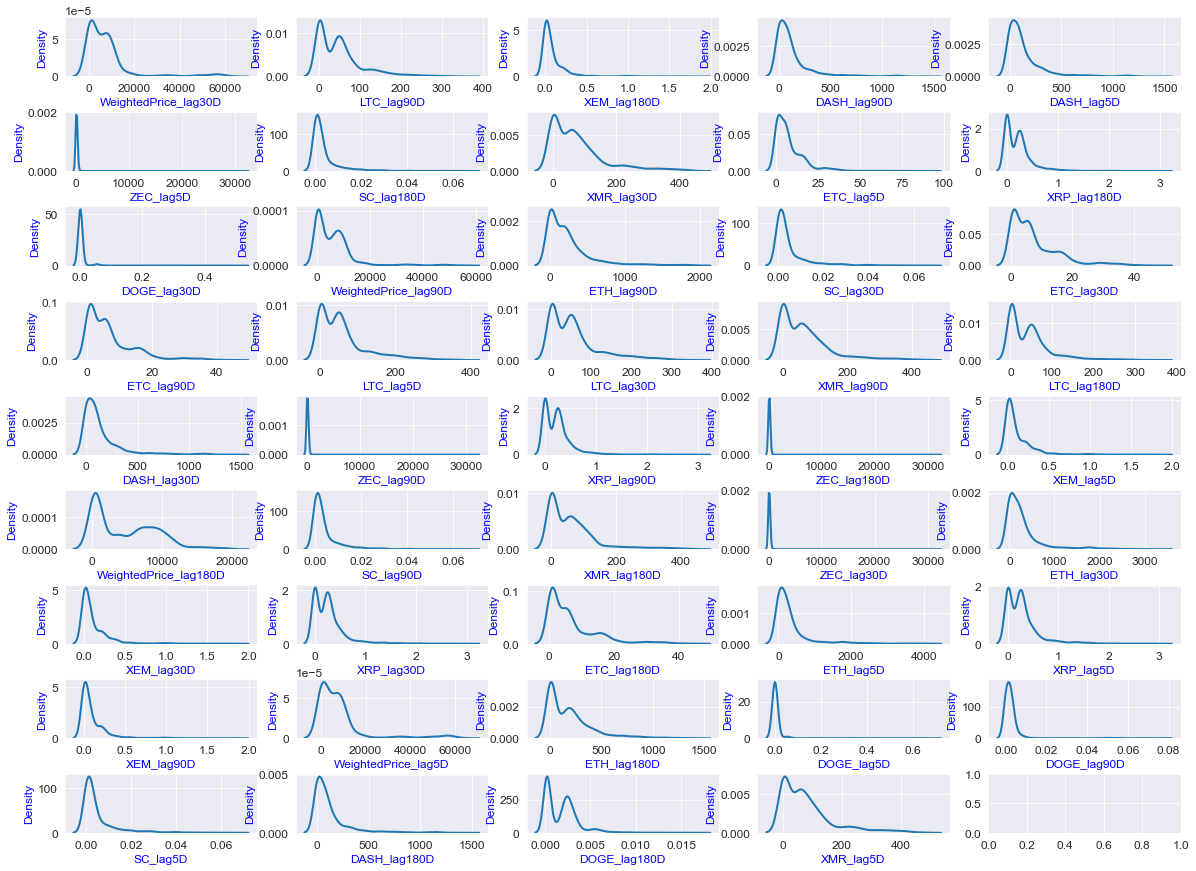

In [47]:
# Distribution Plots

features_return_lag = set(df_btc_united_lagged.iloc[:, 60:104].columns)

fig, ax = plt.subplots(ncols=5, nrows=9, figsize=(20,15))
for feat_num, feat_name in enumerate(features_return_lag):
    sns.kdeplot(data=df_btc_united_lagged, x=df_btc_united_lagged[feat_name], ax=ax[int(feat_num/5), feat_num%5])

plt.show()

#### Boosted Dataset

In [48]:
df_btc_boosted = pd.read_csv(data_path+'bitcoin_boosted_dataset.csv')

In [49]:
df_btc_boosted.set_index('Date', inplace=True)

In [50]:
df_btc_boosted.head()

WeightedPrice_return  DASH_return  DOGE_return  ETC_return  \
Date                                                                     
2019-10-29             -0.010854     0.001603    -0.010854    0.030326   
2019-10-30             -0.020376    -0.015189    -0.055363   -0.030303   
2019-10-31             -0.001602    -0.013015     0.035376   -0.005186   
2019-11-01              0.000995    -0.002803     0.000995    0.011031   
2019-11-02              0.013158     0.011691    -0.023026    0.010137   

            ETH_return  LTC_return  SC_return  XEM_return  XMR_return  \
Date                                                                    
2019-10-29    0.014907    0.006114  -0.057956   -0.006438   -0.002725   
2019-10-30   -0.010662   -0.014041   0.028605   -0.031261   -0.033812   
2019-10-31   -0.015792   -0.006864  -0.001602   -0.024038    0.003036   
2019-11-01    0.000373   -0.004715   0.000995    0.021706    0.016091   
2019-11-02    0.007820    0.007450   0.061404    0.047387    0.045922   

            XRP_return  ...  TSLA_volume  DAX_close   DAX_high    DAX_low  \
Date                    ...                                                 
2019-10-29    0.003858  ...   12684300.0  27.260000  27.260000  27.100000   
2019-10-30   -0.012740  ...    9641800.0  27.350000  27.350000  27.260000   
2019-10-31   -0.010251  ...    5067000.0  27.350000  27.350000  27.350000   
2019-11-01   -0.006190  ...    6383900.0  27.640000  27.640000  27.440000   
2019-11-02    0.007425  ...    8206900.0  27.553143  27.597714  27.442143   

             DAX_open   DAX_volume  Active Addresses  New Addresses  \
Date                                                                  
2019-10-29  27.100000  1807.000000          745317.0       376839.0   
2019-10-30  27.260000  1355.000000          745381.0       385367.0   
2019-10-31  27.350000    86.000000          721479.0       357231.0   
2019-11-01  27.470000  3485.000000          811229.0       401389.0   
2019-11-02  27.506857  2900.571429          649866.0       339994.0   

            Number of Transactions  Zero Balance Addresses  
Date                                                        
2019-10-29                307953.0                452188.0  
2019-10-30                314163.0                448581.0  
2019-10-31                293779.0                435549.0  
2019-11-01                316187.0                498452.0  
2019-11-02                284443.0                384179.0  

[5 rows x 143 columns]

In [51]:
df_btc_boosted.shape

(2654, 143)

In [52]:
df_btc_boosted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, 2019-10-29 to 2021-02-09
Columns: 143 entries, WeightedPrice_return to Zero Balance Addresses
dtypes: float64(138), int64(3), object(2)
memory usage: 2.9+ MB


In [53]:
df_btc_boosted.describe().T

count           mean            std            min  \
WeightedPrice_return    2654.0       0.002153       0.033746      -0.227187   
DASH_return             2654.0       0.004057       0.063231      -0.342895   
DOGE_return             2654.0       0.004778       0.078954      -0.319407   
ETC_return              2654.0       0.003079       0.061000      -0.306498   
ETH_return              2654.0       0.003805       0.052506      -0.877162   
...                        ...            ...            ...            ...   
DAX_volume               578.0   12463.678689   16814.018131      86.000000   
Active Addresses         578.0  942743.501730  173536.094918  543325.000000   
New Addresses            578.0  460646.610727   72848.584432  289223.000000   
Number of Transactions   578.0  303549.505190   35121.479637  179795.000000   
Zero Balance Addresses   578.0  542090.506920   91538.457685  304158.000000   

                                  25%            50%           75%  \
WeightedPrice_return        -0.011616       0.001398  1.641338e-02   
DASH_return                 -0.025517      -0.000619  2.615049e-02   
DOGE_return                 -0.024863      -0.001911  2.179802e-02   
ETC_return                  -0.009472       0.000000  1.093061e-02   
ETH_return                  -0.012273       0.000000  1.974641e-02   
...                               ...            ...           ...   
DAX_volume                4211.750000    7755.916667  1.428107e+04   
Active Addresses        801312.750000  950715.500000  1.079668e+06   
New Addresses           402225.500000  461109.500000  5.162802e+05   
Number of Transactions  282123.250000  309146.000000  3.270842e+05   
Zero Balance Addresses  479471.000000  546064.500000  6.086208e+05   

                                 max  
WeightedPrice_return    4.127627e-01  
DASH_return             6.503333e-01  
DOGE_return             1.427517e+00  
ETC_return              1.877450e+00  
ETH_return              4.203850e-01  
...                              ...  
DAX_volume              1.758520e+05  
Active Addresses        1.368446e+06  
New Addresses           6.853930e+05  
Number of Transactions  4.017440e+05  
Zero Balance Addresses  8.163530e+05  

[141 rows x 8 columns]

In [54]:
df_btc_boosted.isna().sum()

WeightedPrice_return         0
DASH_return                  0
DOGE_return                  0
ETC_return                   0
ETH_return                   0
                          ... 
DAX_volume                2076
Active Addresses          2076
New Addresses             2076
Number of Transactions    2076
Zero Balance Addresses    2076
Length: 143, dtype: int64

In [55]:
cat_feat = df_btc_boosted.select_dtypes(include='object').columns.tolist()

In [56]:
cat_feat

['sentiment_elon', 'sentiment_bitcoin']

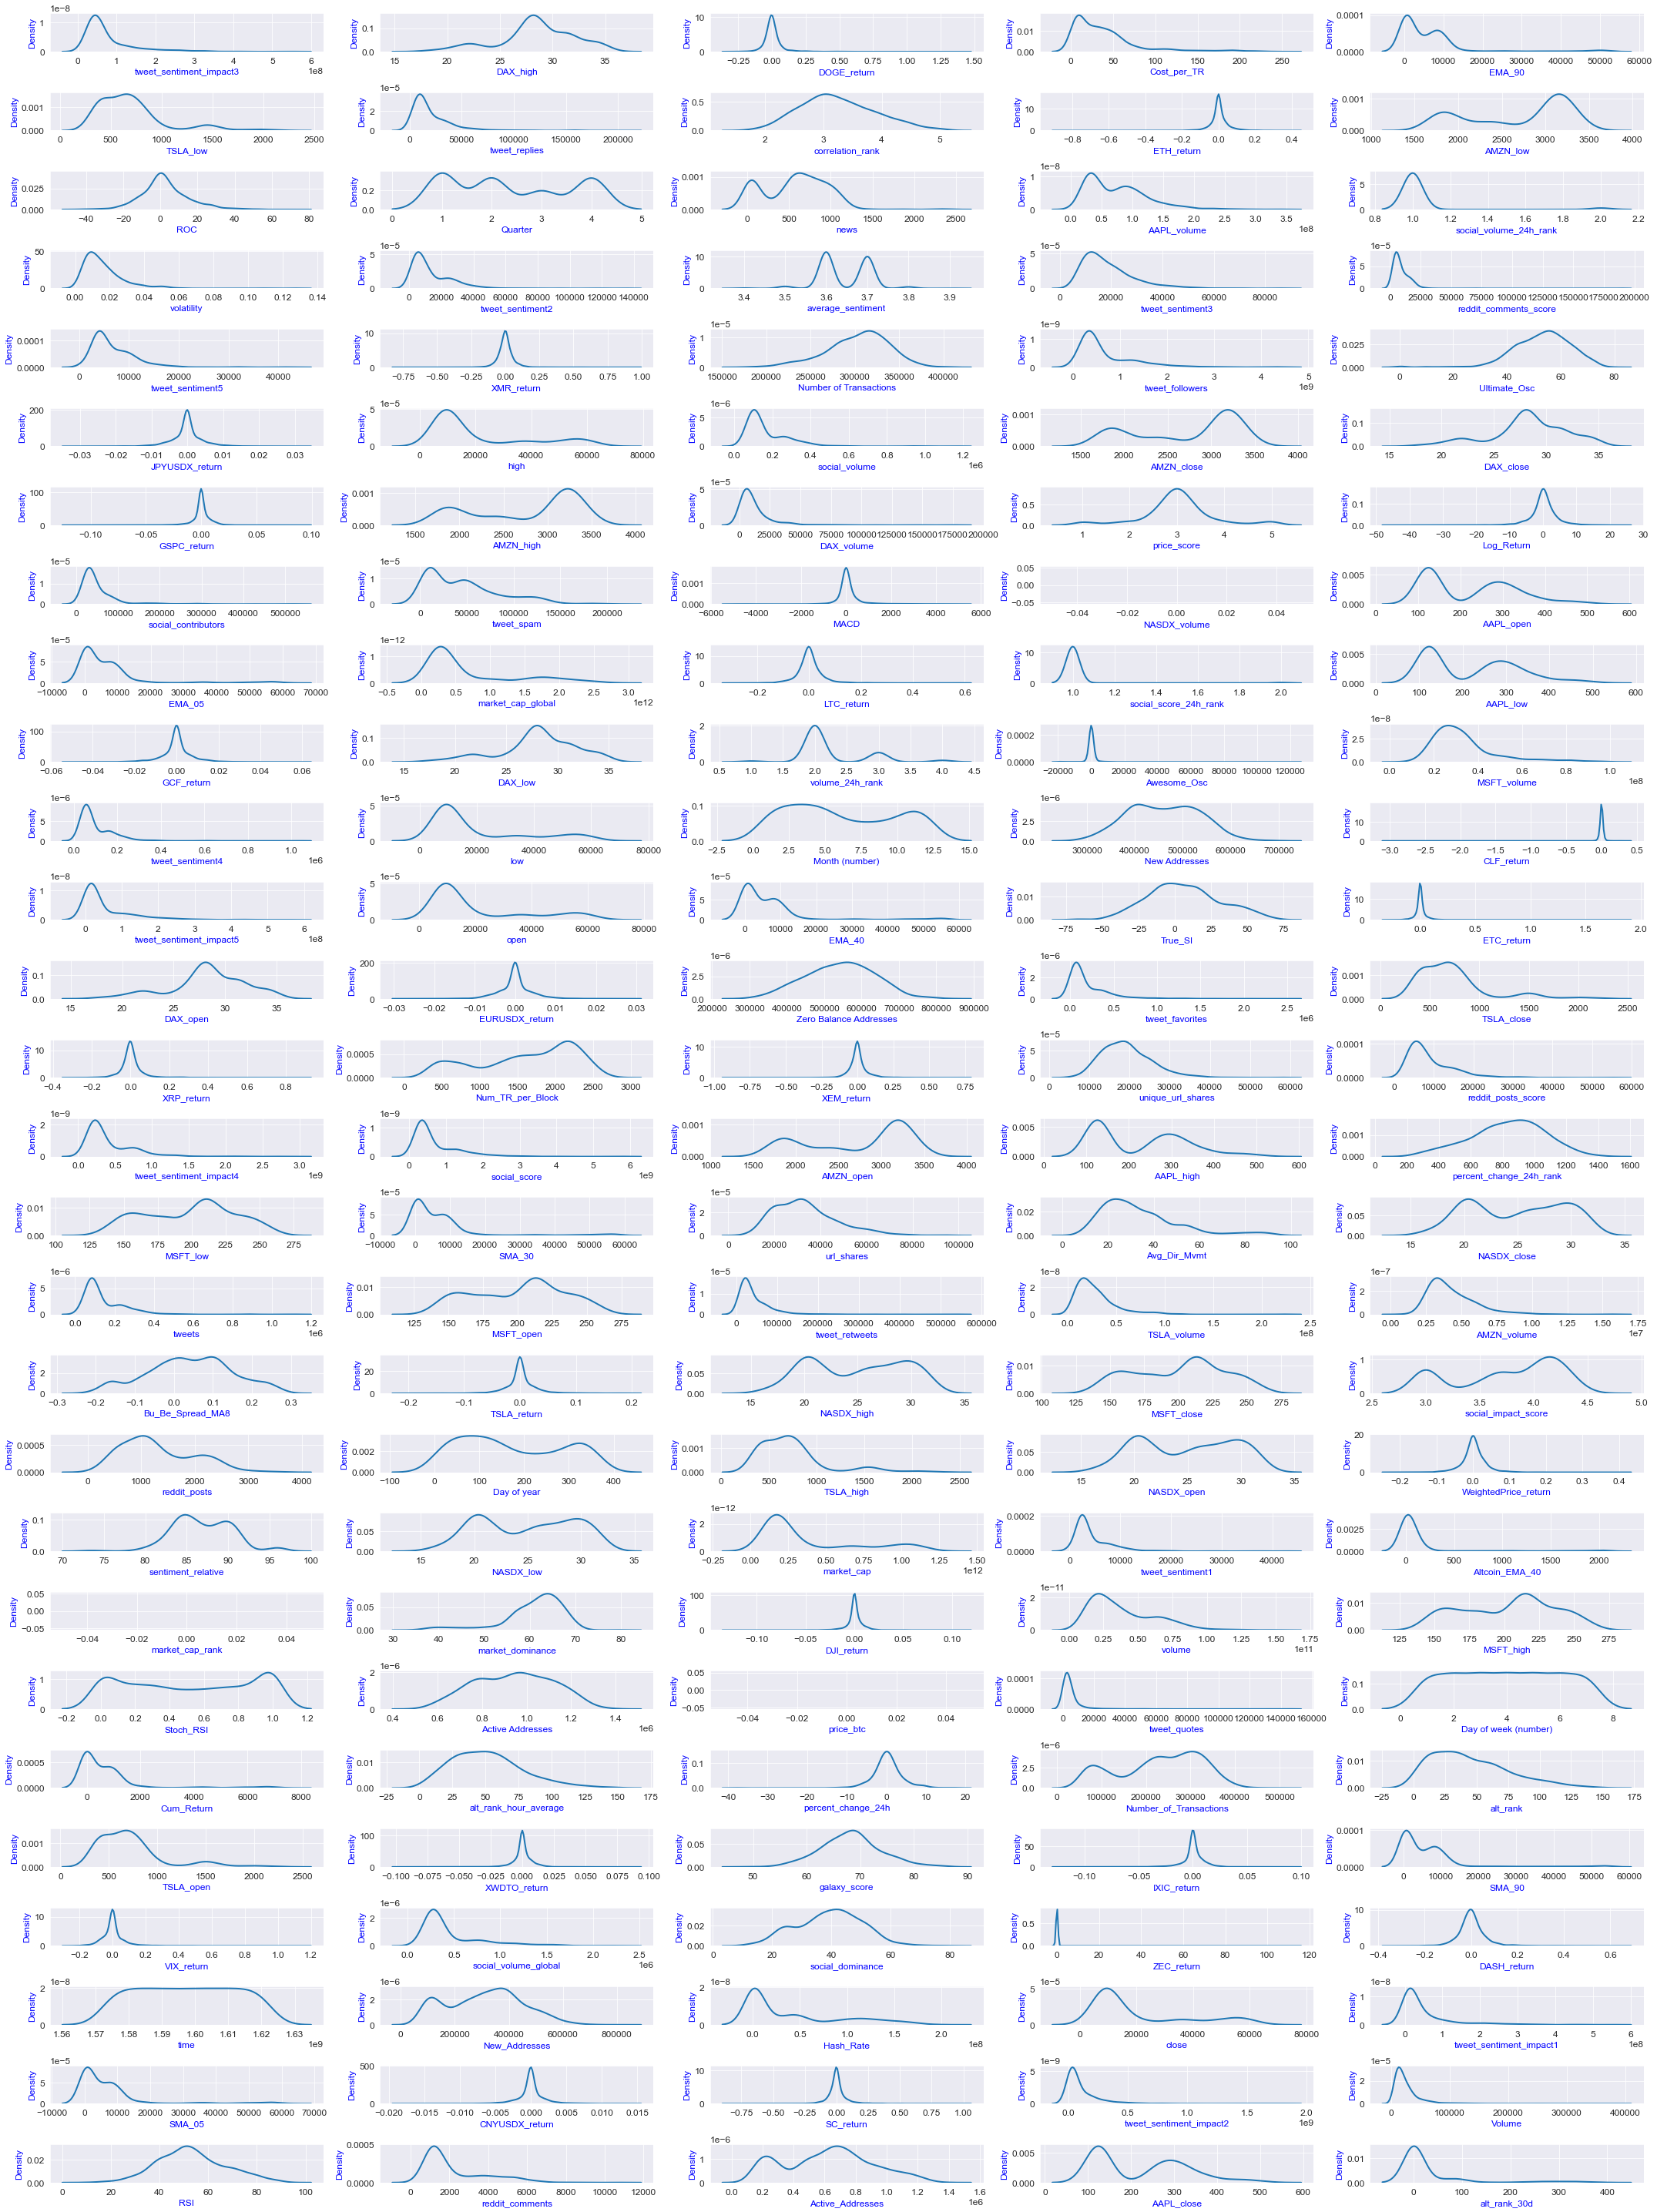

In [57]:
# Distribution Plots

features_boost = set(df_btc_boosted.columns) - set(['sentiment_elon', 'sentiment_bitcoin', 'Year'])

fig, ax = plt.subplots(ncols=5, nrows=28, figsize=(30,40))
for feat_num, feat_name in enumerate(features_boost):
    sns.kdeplot(data=df_btc_boosted, x=df_btc_boosted[feat_name], ax=ax[int(feat_num/5), feat_num%5])
plt.tight_layout()
plt.show()

<a id='s2'></a>
### <font color='darkblue'>__Stationarity tests__</font>

#### Stationarity Test Daily Prices Dataset

<AxesSubplot:title={'center':'BTC Prices'}, xlabel='Date'>

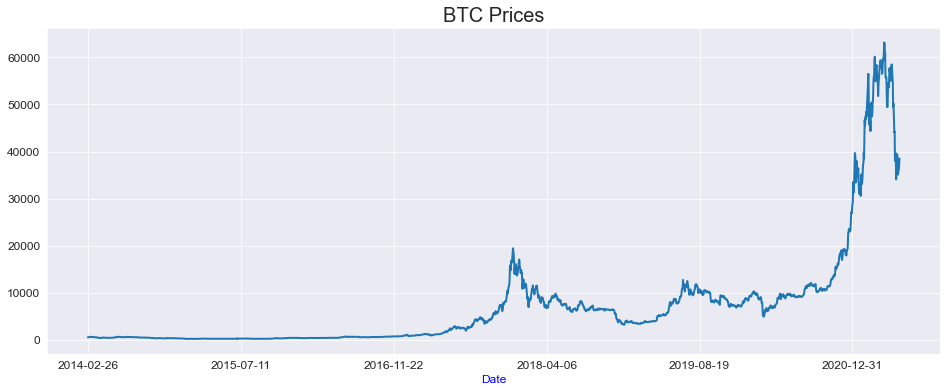

In [58]:
df_btc_sentiment_merged['WeightedPrice'].plot(legend=None, title='BTC Prices')

<AxesSubplot:title={'center':'LOG BTC Prices'}, xlabel='Date'>

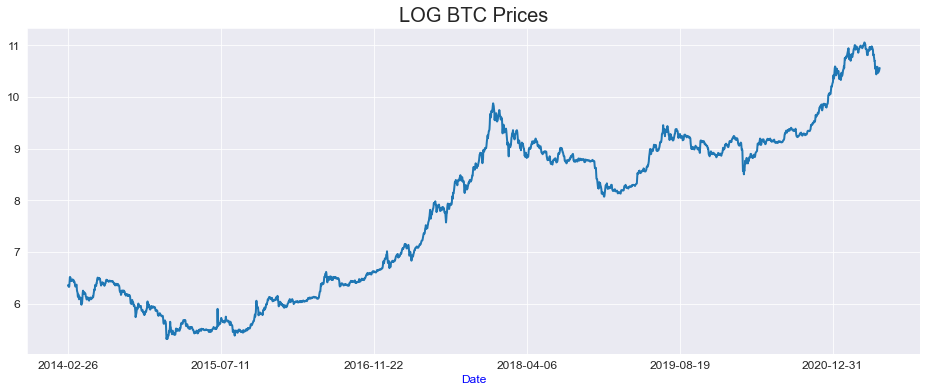

In [59]:
np.log(df_btc_sentiment_merged['WeightedPrice']).plot(legend=None, title='LOG BTC Prices')

In [60]:
# Perform stationarity test on the dataset before pct-change transformation
result_adf_price = adfuller(df_btc_sentiment_merged['WeightedPrice'])

In [61]:
print(f'ADF Statistic: {result_adf_price[0]}')
print(f'n_lags: {result_adf_price[1]}')
print(f'p-value: {result_adf_price[1]}')
for key, value in result_adf_price[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.854419651726885
n_lags: 0.802612041825002
p-value: 0.802612041825002
Critial Values:
   1%, -3.432841702058772
Critial Values:
   5%, -2.8626408441287974
Critial Values:
   10%, -2.5673560179979247


#### Trend and Sesonal Decomposition - Daily Prices

In [62]:
decomposition = seasonal_decompose(x=df_btc_sentiment_merged['WeightedPrice'], model='additive', period=365)
observed_price = decomposition.observed
trend_price = decomposition.trend
seasonal_price = decomposition.seasonal
residual_price = decomposition.resid
df_decomp_price = pd.DataFrame({"observed":observed_price, "seasonal":seasonal_price,"residual":residual_price})

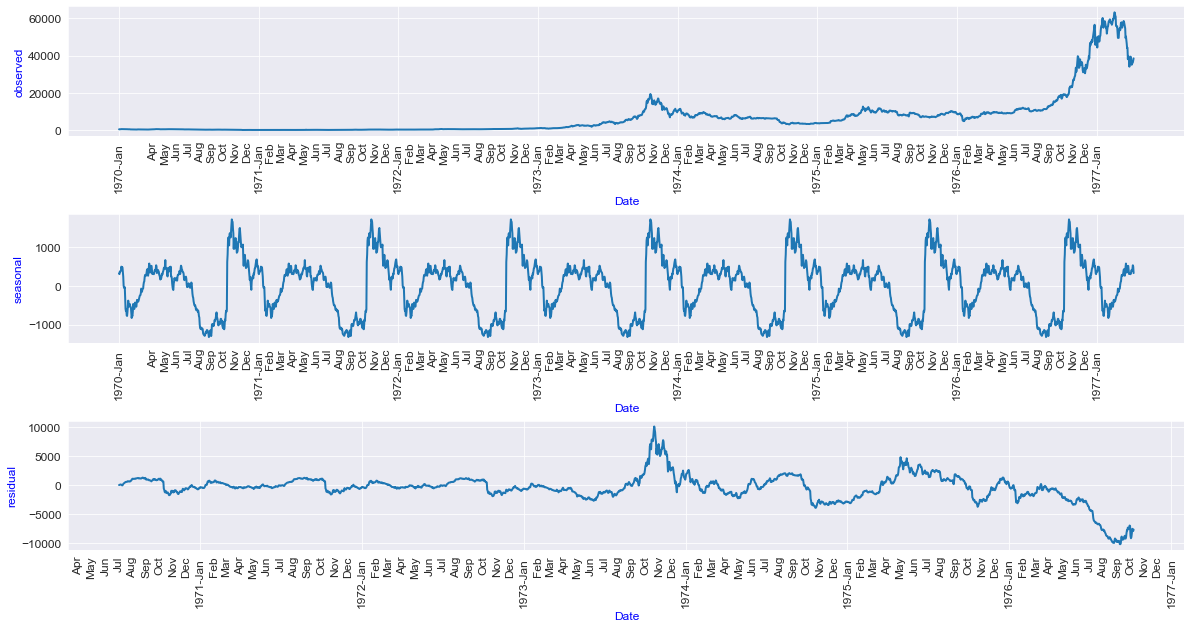

In [63]:
years = mdates.YearLocator()    # only print label for the years
months = mdates.MonthLocator()  # mark months as ticks
years_fmt = mdates.DateFormatter('%Y-%b')
fmt = mdates.DateFormatter('%b')

_, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax = df_decomp_price.iloc[:,i].plot(ax=ax)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(fmt)
    ax.set_ylabel(df_decomp_price.iloc[:,i].name)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

#### Stationarity Test Transformed Dataset (Daily Prices to Daily Returns)

In [64]:
# Perform stationarity test on the transformed dataset
result_tr = adfuller(df_btc_united_sentiment['WeightedPrice_return'])

In [65]:
print(f'ADF Statistic: {result_tr[0]}')
print(f'n_lags: {result_tr[1]}')
print(f'p-value: {result_tr[1]}')
for key, value in result_tr[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -34.97043776259842
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4328181903683084
Critial Values:
   5%, -2.862630460868777
Critial Values:
   10%, -2.567350489894647


#### Trend and Sesonal Decomposition - Daily Prices

In [66]:
decomposition_return = seasonal_decompose(x=df_btc_united_sentiment['WeightedPrice_return'], model='additive', period=365)
observed_return = decomposition_return.observed
trend_return = decomposition_return.trend
seasonal_return = decomposition_return.seasonal
residual_return = decomposition_return.resid
df_decomp_return = pd.DataFrame({"observed":observed_return, "seasonal":seasonal_return,"residual":residual_return})

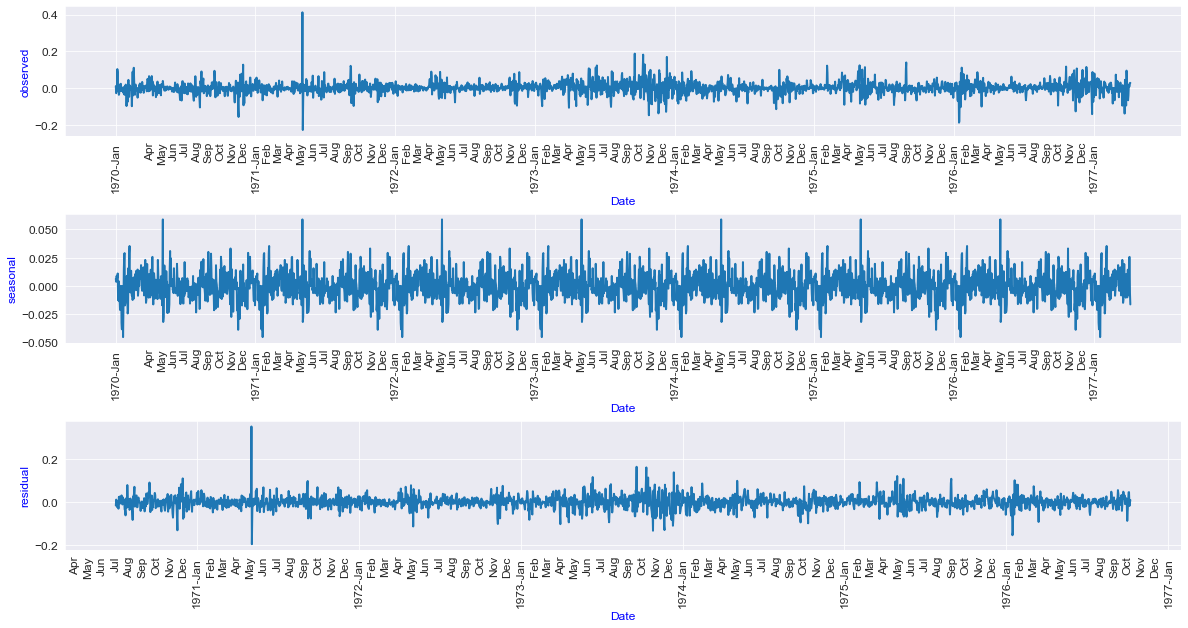

In [67]:
years = mdates.YearLocator()    # only print label for the years
months = mdates.MonthLocator()  # mark months as ticks
years_fmt = mdates.DateFormatter('%Y-%b')
fmt = mdates.DateFormatter('%b')

_, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax = df_decomp_return.iloc[:,i].plot(ax=ax)
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(fmt)
    ax.set_ylabel(df_decomp_return.iloc[:,i].name)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

<a id='s3'></a>
### <font color='darkblue'>__Autocorrelation tests__</font>

#### Autocorrelation - Daily Price Dataset

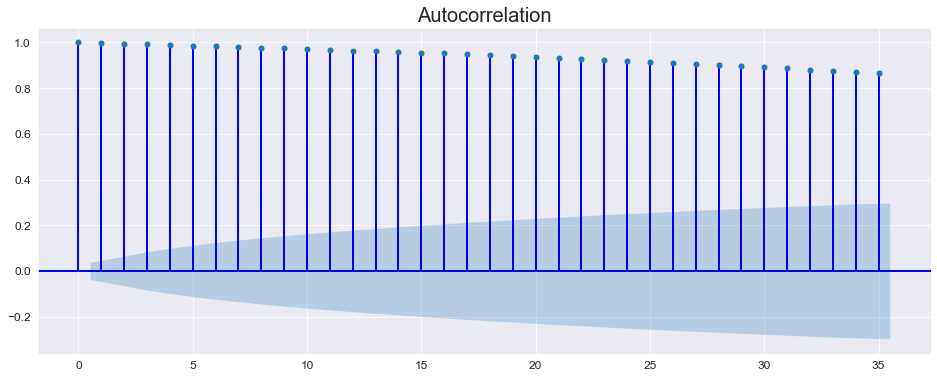

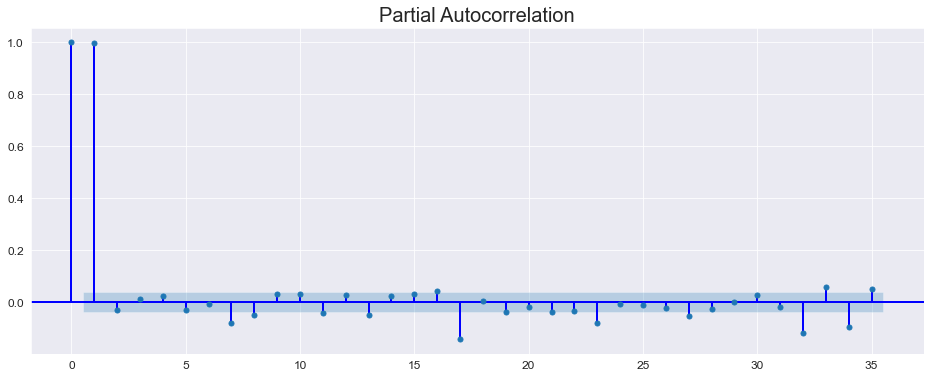

In [68]:
acf = plot_acf(df_btc_sentiment_merged['WeightedPrice'])
pacf = plot_pacf(df_btc_sentiment_merged['WeightedPrice'])

#### Autocorrelation - Transformed Dataset (Daily Returns)

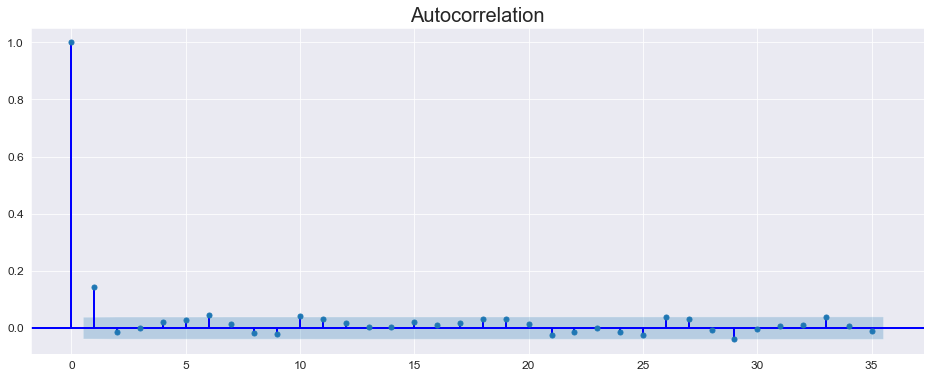

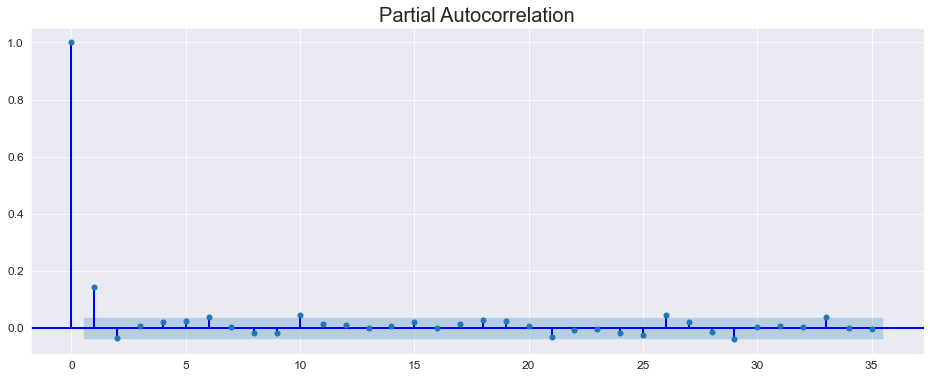

In [69]:
acf_tr = plot_acf(df_btc_united_sentiment['WeightedPrice_return'])
pacf_tr = plot_pacf(df_btc_united_sentiment['WeightedPrice_return'])

#### Homeskedasticity Test - Daily Prices Dataset

In [70]:
df_btc_sentiment_merged.columns

Index(['Open', 'High', 'Low', 'Close', 'WeightedPrice', 'Volume', 'SMA_30',
       'EMA_40', 'Altcoin_EMA_40', 'DASH', 'DOGE', 'ETC', 'ETH', 'LTC', 'SC',
       'XEM', 'XMR', 'XRP', 'ZEC', 'CLF', 'CNYUSDX', 'DJI', 'EURUSDX', 'GCF',
       'GSPC', 'IXIC', 'JPYUSDX', 'TSLA', 'VIX', 'XWDTO', 'Cost_per_TR',
       'Num_TR_per_Block', 'Bu_Be_Spread_MA8', 'SMA_05', 'SMA_90', 'EMA_05',
       'EMA_90', 'MACD', 'Avg_Dir_Mvmt', 'RSI', 'Awesome_Osc', 'ROC',
       'Stoch_RSI', 'Ultimate_Osc', 'True_SI', 'Cum_Return', 'Log_Return',
       'Number_of_Transactions', 'Active_Addresses', 'New_Addresses',
       'Hash_Rate', 'sentiment_elon', 'sentiment_bitcoin'],
      dtype='object')

In [71]:
f ='WeightedPrice ~ Volume+SMA_30+EMA_40+Altcoin_EMA_40+DASH+DOGE+ETC+ETH+LTC+SC+XEM+XMR+XRP+ZEC+CLF+CNYUSDX+DJI+EURUSDX+GCF+GSPC+IXIC+JPYUSDX+TSLA+VIX+XWDTO+Cost_per_TR+Num_TR_per_Block+Bu_Be_Spread_MA8+SMA_05+SMA_90+EMA_05+EMA_90+MACD+Avg_Dir_Mvmt+RSI+Awesome_Osc+ROC+Stoch_RSI+Ultimate_Osc+True_SI+Cum_Return+Log_Return+Number_of_Transactions+Active_Addresses+New_Addresses+Hash_Rate'

In [72]:
hsk_btc_model = ols(formula=f, data=df_btc_sentiment_merged).fit()

In [73]:
print(hsk_btc_model.summary())

                            OLS Regression Results                            
Dep. Variable:          WeightedPrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.582e+05
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:41:20   Log-Likelihood:                -16920.
No. Observations:                2655   AIC:                         3.393e+04
Df Residuals:                    2608   BIC:                         3.421e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                339

In [74]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(hsk_btc_model.resid, hsk_btc_model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 975.9878163624837),
 ('p-value', 1.5180254583866822e-174),
 ('f-value', 32.95644087738822),
 ('f p-value', 3.238306378890896e-222)]

<a id='s4'></a>
### <font color='darkblue'>__Homoskedasticity tests__</font>

#### Homoskedasticity Test - Transformed Dataset (Daily Returns)

In [75]:
df_btc_united_sentiment.columns

Index(['WeightedPrice_return', 'DASH_return', 'DOGE_return', 'ETC_return',
       'ETH_return', 'LTC_return', 'SC_return', 'XEM_return', 'XMR_return',
       'XRP_return', 'ZEC_return', 'CLF_return', 'CNYUSDX_return',
       'DJI_return', 'EURUSDX_return', 'GCF_return', 'GSPC_return',
       'IXIC_return', 'JPYUSDX_return', 'TSLA_return', 'VIX_return',
       'XWDTO_return', 'Volume', 'SMA_30', 'EMA_40', 'Altcoin_EMA_40',
       'Cost_per_TR', 'Num_TR_per_Block', 'Bu_Be_Spread_MA8', 'SMA_05',
       'SMA_90', 'EMA_05', 'EMA_90', 'MACD', 'Avg_Dir_Mvmt', 'RSI',
       'Awesome_Osc', 'ROC', 'Stoch_RSI', 'Ultimate_Osc', 'True_SI',
       'Cum_Return', 'Log_Return', 'Number_of_Transactions',
       'Active_Addresses', 'New_Addresses', 'Hash_Rate', 'sentiment_elon',
       'sentiment_bitcoin'],
      dtype='object')

In [76]:
f_tr ='WeightedPrice_return ~ DASH_return+DOGE_return+ETC_return+ETH_return+LTC_return+SC_return+XEM_return+XMR_return+XRP_return+ZEC_return+CLF_return+CNYUSDX_return+DJI_return+EURUSDX_return+GCF_return+GSPC_return+IXIC_return+JPYUSDX_return+TSLA_return+VIX_return+XWDTO_return+Volume+SMA_30+EMA_40+Altcoin_EMA_40+Cost_per_TR+Num_TR_per_Block+Bu_Be_Spread_MA8+SMA_05+SMA_90+EMA_05+EMA_90+MACD+Avg_Dir_Mvmt+RSI+Awesome_Osc+ROC+Stoch_RSI+Ultimate_Osc+True_SI+Cum_Return+Log_Return+Number_of_Transactions+Active_Addresses+New_Addresses+Hash_Rate'

In [77]:
hsk_btc_tr = ols(formula=f_tr, data=df_btc_united_sentiment).fit()

In [78]:
print(hsk_btc_tr.summary())

                             OLS Regression Results                             
Dep. Variable:     WeightedPrice_return   R-squared:                       0.721
Model:                              OLS   Adj. R-squared:                  0.716
Method:                   Least Squares   F-statistic:                     146.7
Date:                  Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                          16:41:20   Log-Likelihood:                 6924.6
No. Observations:                  2654   AIC:                        -1.376e+04
Df Residuals:                      2607   BIC:                        -1.348e+04
Df Model:                            46                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

In [79]:
#perform Bresuch-Pagan test
names_tr = ['Lagrange multiplier statistic', 'p-value',
            'f-value', 'f p-value']
test_tr = sms.het_breuschpagan(hsk_btc_tr.resid, hsk_btc_tr.model.exog)

lzip(names_tr, test_tr)

[('Lagrange multiplier statistic', 488.70732122749394),
 ('p-value', 2.5408843498366685e-75),
 ('f-value', 12.791322160965072),
 ('f p-value', 1.6725979220193235e-84)]

<h5>We can conclude that the transformed dataset (daily prices of Bitcoin, Alternative Coins and Assets converted to daily returns) is more suitable for use for our Machine Learning model comparison tests as with the transformation we can achieve the stationarity of the time series and eliminate the autocorrelation problem of the error terms</h5>

<a id='s3'></a>
### <font color='darkblue'>__Correlation__</font>

<a id='s5'></a>
### <font color='darkblue'>__Correlation Matrices__</font>

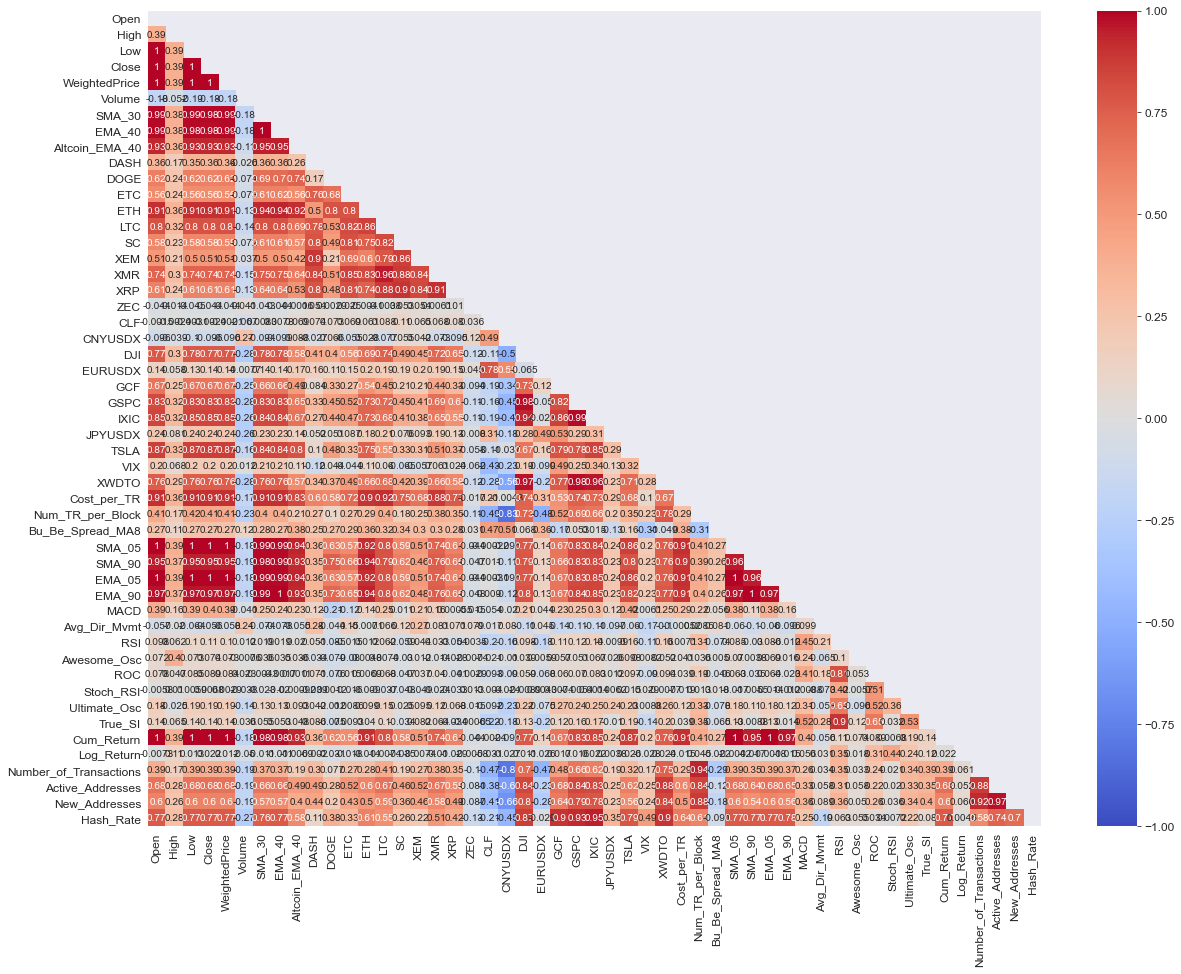

In [80]:
# Pearson Correlation Heatmap Original Daily Prices Dataset
corrmat_heat_orig = df_btc_sentiment_merged.corr()
fix, ax = plt.subplots(figsize=(20,15))
matrix = np.triu(corrmat_heat_orig)
_ax = sns.heatmap(corrmat_heat_orig, annot=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)
plt.show()

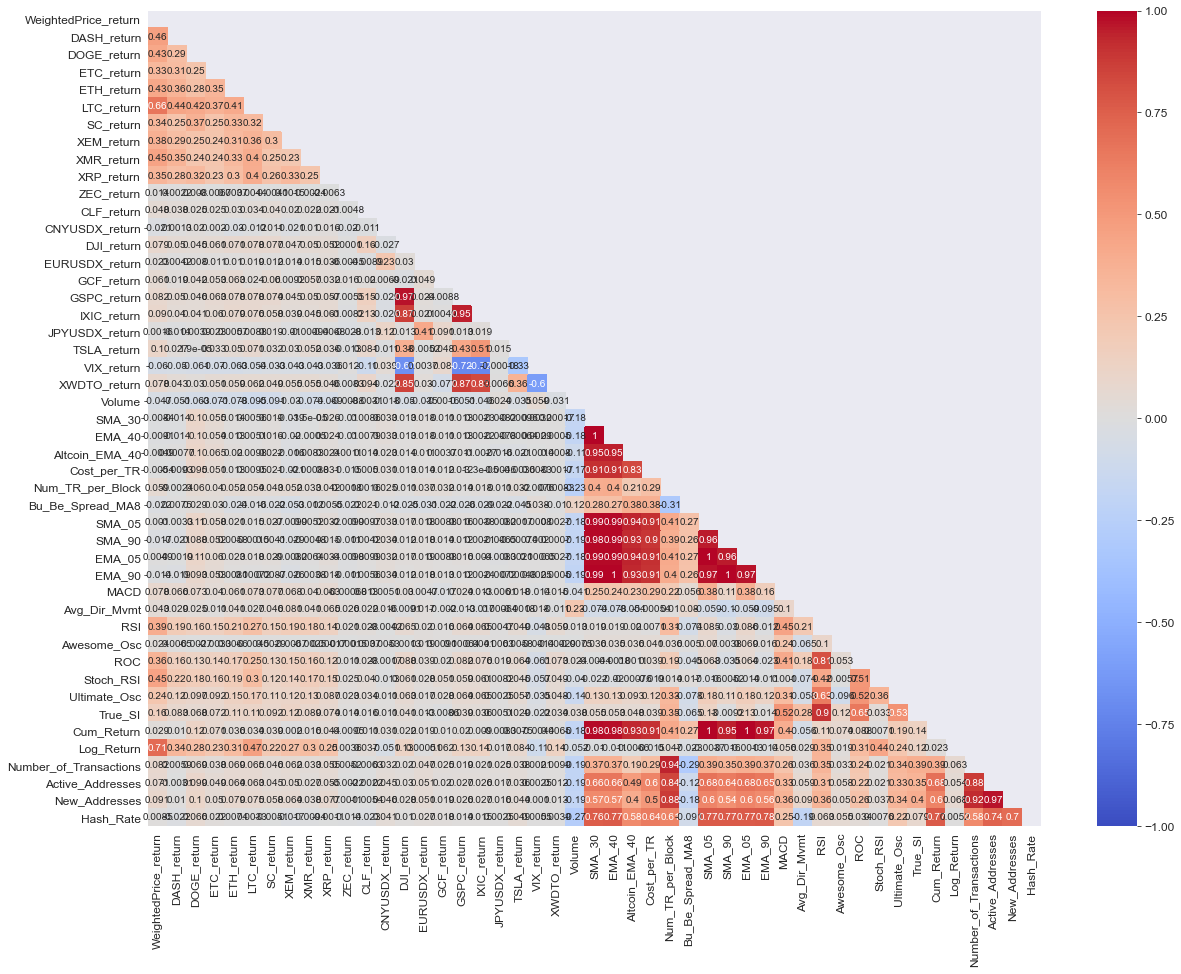

In [81]:
# Pearson Correlation Heatmap Daily Returns Dataset

corrmat_heat = df_btc_united_sentiment.corr()
fix, ax = plt.subplots(figsize=(20,15))
matrix = np.triu(corrmat_heat)
_ax = sns.heatmap(corrmat_heat, annot=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)
plt.show()

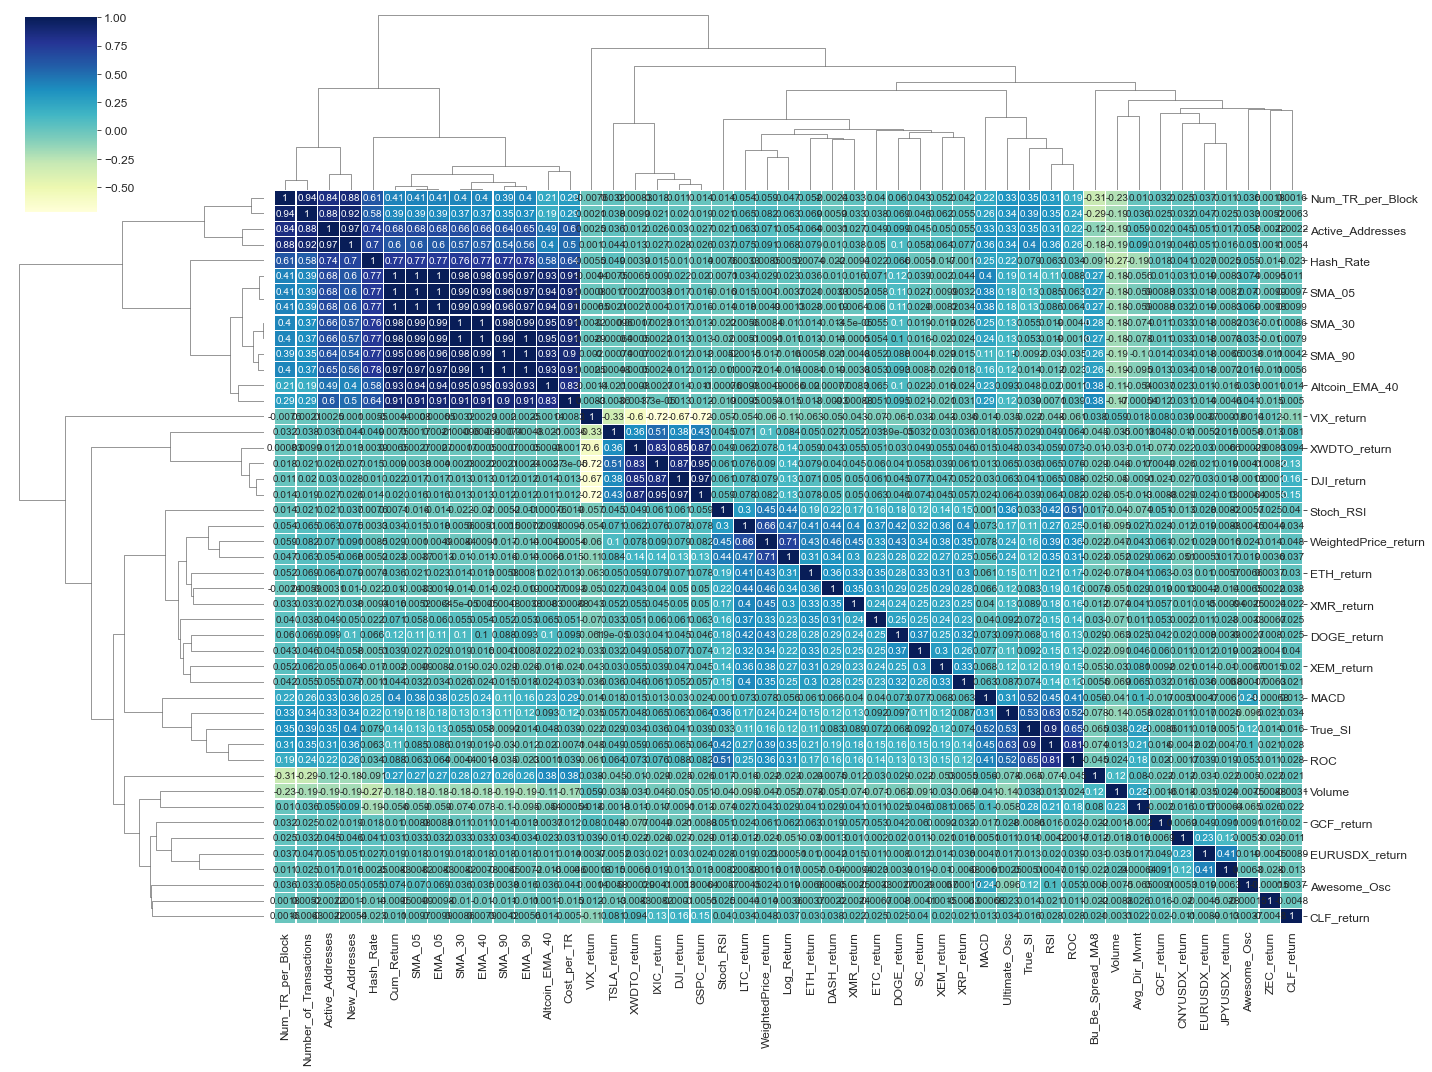

In [82]:
# Correlation clustermap

corrmat_clmap = df_btc_united_sentiment.corr()
g = sns.clustermap(corrmat_clmap, annot=True, cmap ="YlGnBu", linewidths = 0.1, figsize=(20,15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
plt.show()

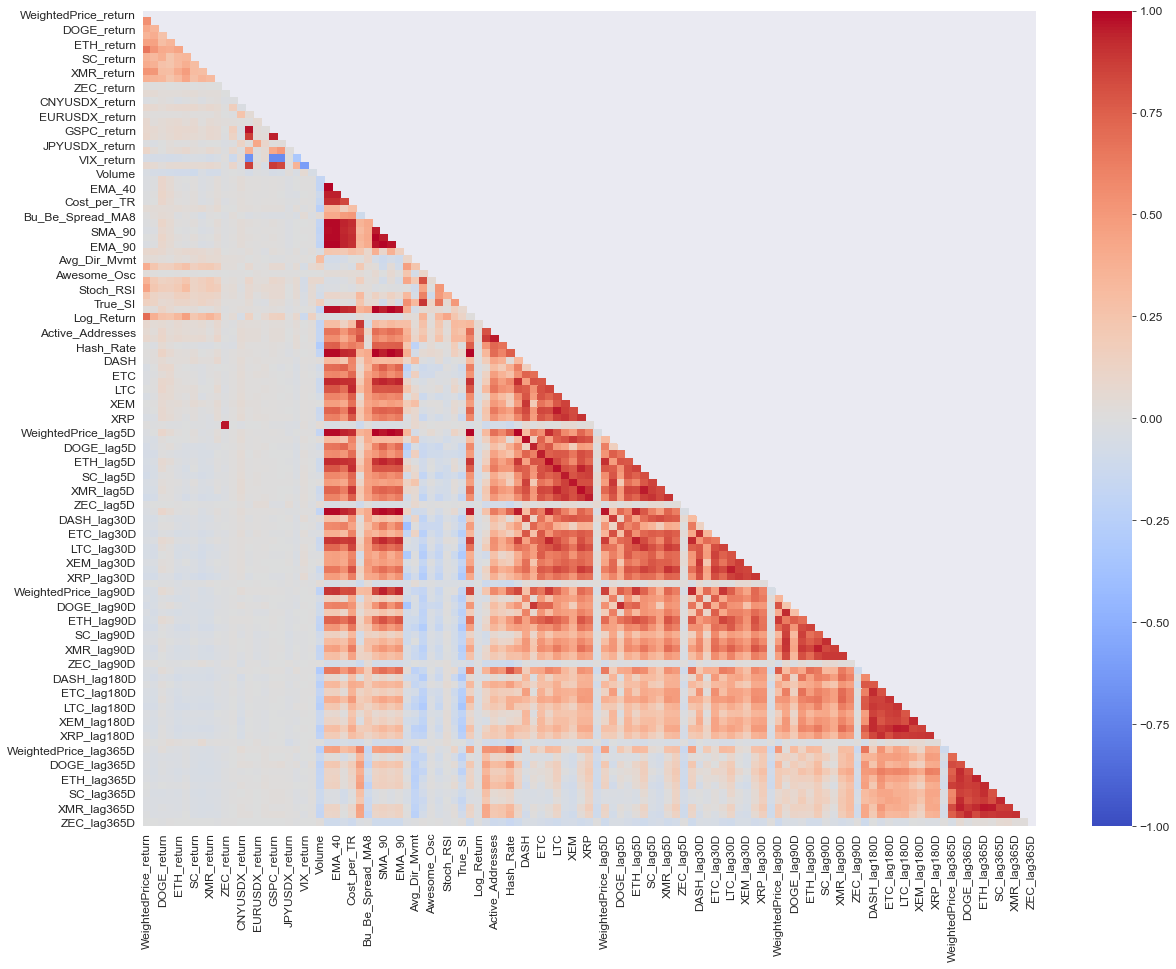

In [83]:
# Pearson Correlation Heatmap Daily Returns with Lags

corrmat_heat_lag = df_btc_united_lagged.corr()
fix, ax = plt.subplots(figsize=(20,15))
matrix = np.triu(corrmat_heat_lag)
_ax = sns.heatmap(corrmat_heat_lag, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)
plt.show()